In [4]:
import pandas as pd
import numpy as np
df=pd.read_csv("stock_details_5_years.csv")
df

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits,Company
0,2018-11-29 00:00:00-05:00,43.829761,43.863354,42.639594,43.083508,167080000,0.00,0.0,AAPL
1,2018-11-29 00:00:00-05:00,104.769074,105.519257,103.534595,104.636131,28123200,0.00,0.0,MSFT
2,2018-11-29 00:00:00-05:00,54.176498,55.007500,54.099998,54.729000,31004000,0.00,0.0,GOOGL
3,2018-11-29 00:00:00-05:00,83.749496,84.499496,82.616501,83.678497,132264000,0.00,0.0,AMZN
4,2018-11-29 00:00:00-05:00,39.692784,40.064904,38.735195,39.037853,54917200,0.04,0.0,NVDA
...,...,...,...,...,...,...,...,...,...
9607,2018-12-31 00:00:00-05:00,114.629997,116.639999,114.629997,116.220001,468000,0.00,0.0,MOH
9608,2018-12-31 00:00:00-05:00,26.142448,26.498192,26.142448,26.498192,1078600,0.00,0.0,BRO
9609,2018-12-31 00:00:00-05:00,19.752691,19.837995,19.269299,19.591560,1113100,0.00,0.0,MT
9610,2018-12-31 00:00:00-05:00,240.350006,244.860001,239.559998,244.839996,719800,0.00,0.0,ULTA


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9612 entries, 0 to 9611
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          9612 non-null   object 
 1   Open          9612 non-null   float64
 2   High          9612 non-null   float64
 3   Low           9612 non-null   float64
 4   Close         9612 non-null   float64
 5   Volume        9612 non-null   int64  
 6   Dividends     9611 non-null   float64
 7   Stock Splits  9611 non-null   float64
 8   Company       9611 non-null   object 
dtypes: float64(6), int64(1), object(2)
memory usage: 676.0+ KB


In [6]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import numpy as np



# Prepare data
df['Date'] = pd.to_datetime(df['Date'])
df = df.sort_values(['Company', 'Date'])

# Create target: next-day Close
df['Next_Close'] = df.groupby('Company')['Close'].shift(-1)
df = df.dropna()

# Features and target
X = df[['Open', 'High', 'Low', 'Close', 'Volume']]
y = df['Next_Close']

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, shuffle=True
)

# Random Forest Regressor
rf_reg = RandomForestRegressor(
    n_estimators=30,      # fewer trees for speed
    max_depth=10,         # limit depth
    random_state=42,
    n_jobs=-1
)
rf_reg.fit(X_train, y_train)

# Predictions
y_pred = rf_reg.predict(X_test)

# Evaluation
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("Random Forest Regression RMSE:", rmse)


Random Forest Regression RMSE: 3.1256290431715863


Random Forest Regression RMSE: 5.260951930514002


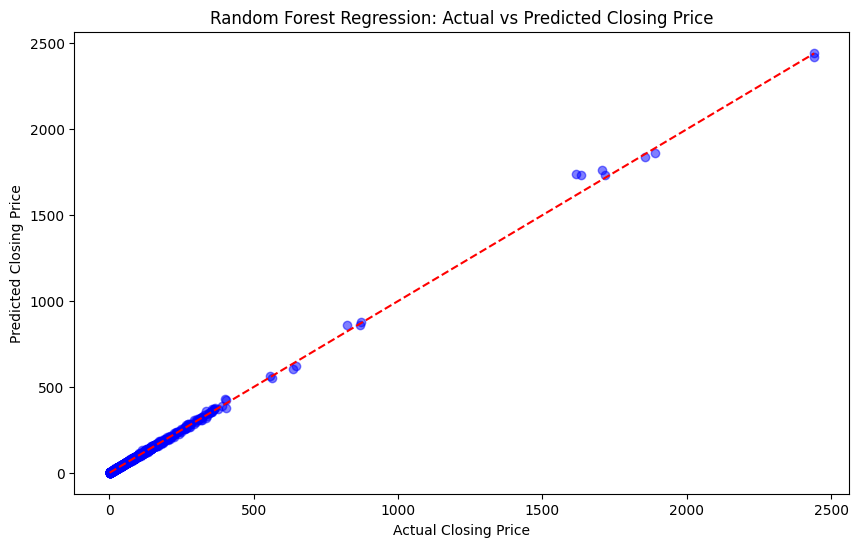

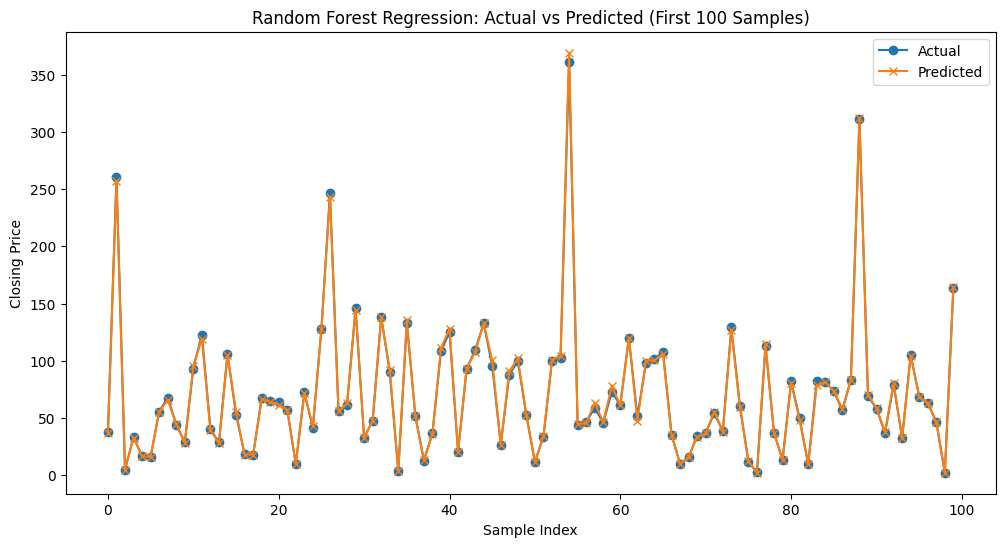

In [7]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import numpy as np
import matplotlib.pyplot as plt


# Prepare data (fix timezone issue)
df['Date'] = pd.to_datetime(df['Date'], utc=True)   # keeps UTC
df = df.sort_values(['Company', 'Date'])

# Create target: next-day Close
df['Next_Close'] = df.groupby('Company')['Close'].shift(-1)
df = df.dropna()

# Features and target
X = df[['Open', 'High', 'Low', 'Close', 'Volume']]
y = df['Next_Close']

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, shuffle=True
)

# Random Forest Regressor
rf_reg = RandomForestRegressor(
    n_estimators=30,
    max_depth=10,
    random_state=42,
    n_jobs=-1
)
rf_reg.fit(X_train, y_train)

# Predictions
y_pred = rf_reg.predict(X_test)

# Evaluation
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("Random Forest Regression RMSE:", rmse)

# ------------------ Plot 1: Actual vs Predicted Scatter ------------------
plt.figure(figsize=(10,6))
plt.scatter(y_test, y_pred, alpha=0.5, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # ideal line
plt.xlabel("Actual Closing Price")
plt.ylabel("Predicted Closing Price")
plt.title("Random Forest Regression: Actual vs Predicted Closing Price")
plt.show()

# ------------------ Plot 2: Time-Series Comparison ------------------
plt.figure(figsize=(12,6))
plt.plot(y_test.values[:100], label="Actual", marker='o')
plt.plot(y_pred[:100], label="Predicted", marker='x')
plt.xlabel("Sample Index")
plt.ylabel("Closing Price")
plt.title("Random Forest Regression: Actual vs Predicted (First 100 Samples)")
plt.legend()
plt.show()


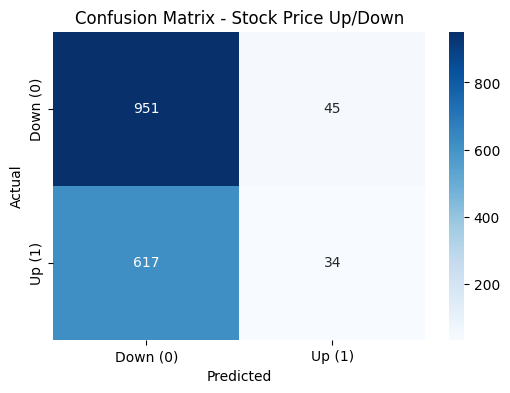

              precision    recall  f1-score   support

    Down (0)       0.61      0.95      0.74       996
      Up (1)       0.43      0.05      0.09       651

    accuracy                           0.60      1647
   macro avg       0.52      0.50      0.42      1647
weighted avg       0.54      0.60      0.49      1647



In [8]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt


# Prepare data
df['Date'] = pd.to_datetime(df['Date'], utc=True)
df = df.sort_values(['Company', 'Date'])

# Create next-day Close
df['Next_Close'] = df.groupby('Company')['Close'].shift(-1)
df = df.dropna()

# Classification target: Up (1) if price increases, Down (0) otherwise
df['UpDown'] = (df['Next_Close'] > df['Close']).astype(int)

# Features and target
X = df[['Open', 'High', 'Low', 'Close', 'Volume']]
y = df['UpDown']

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, shuffle=True
)

# Random Forest Classifier
rf_clf = RandomForestClassifier(n_estimators=50, max_depth=10, random_state=42, n_jobs=-1)
rf_clf.fit(X_train, y_train)

# Predictions
y_pred = rf_clf.predict(X_test)

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=["Down (0)", "Up (1)"],
            yticklabels=["Down (0)", "Up (1)"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Stock Price Up/Down")
plt.show()

# Classification report (Precision, Recall, F1)
print(classification_report(y_test, y_pred, target_names=["Down (0)", "Up (1)"]))


/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/20
971/971 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.5703 - loss: 0.6836 - val_accuracy: 0.5781 - val_loss: 0.6783
Epoch 2/20
971/971 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - accuracy: 0.5717 - loss: 0.6795 - val_accuracy: 0.5757 - val_loss: 0.6784
Epoch 3/20
971/971 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - accuracy: 0.5793 - loss: 0.6770 - val_accuracy: 0.5799 - val_loss: 0.6763
Epoch 4/20
971/971 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.5717 - loss: 0.6776 - val_accuracy: 0.5829 - val_loss: 0.6744
Epoch 5/20
971/971 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.5714 - loss: 0.6751 - val_accuracy: 0.5866 - val_loss: 0.6710
Epoch 6/20
971/971 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - accuracy: 0.5804 - loss: 0.6686 - val_accuracy: 0.5883 - val_loss: 0.6676
Epoch 7/20
971/971 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.5810 - loss: 0.6672 - val_accuracy: 0.5951 - val_loss: 0.6686
Epoch 8/20
971/971 ━━━━━━━━━━━━━━━━━━━━ 12s 8ms/step - accuracy: 0.5894 - loss: 0.6633 - val_accuracy

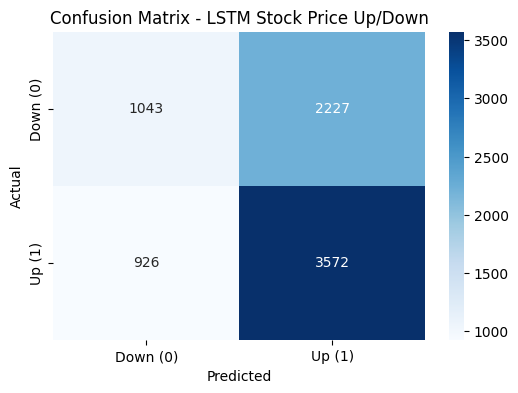

              precision    recall  f1-score   support

    Down (0)       0.53      0.32      0.40      3270
      Up (1)       0.62      0.79      0.69      4498

    accuracy                           0.59      7768
   macro avg       0.57      0.56      0.55      7768
weighted avg       0.58      0.59      0.57      7768



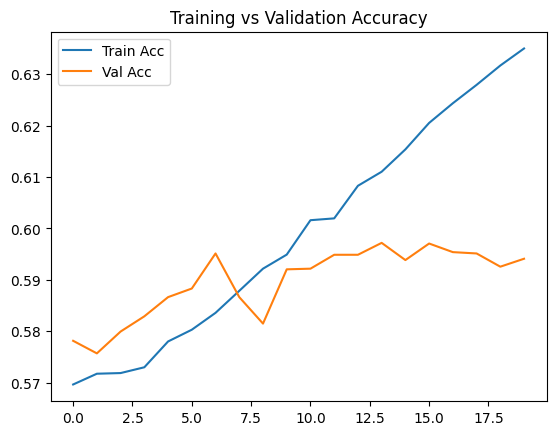

In [11]:
# ------------------ Imports ------------------
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

# ------------------ Load Data ------------------
df = pd.read_csv("stock_details_5_years.csv")

# Convert Date
df['Date'] = pd.to_datetime(df['Date'], utc=True)
df = df.sort_values(['Company', 'Date'])

# Next-day Close
df['Next_Close'] = df.groupby('Company')['Close'].shift(-1)

# Drop NaN
df = df.dropna()

# ------------------ Feature Engineering ------------------
df['Return'] = (df['Close'] - df['Open']) / df['Open']
df['Prev_Close'] = df.groupby('Company')['Close'].shift(1)
df['Pct_Change'] = (df['Close'] - df['Prev_Close']) / df['Prev_Close']

df['MA5'] = df.groupby('Company')['Close'].transform(lambda x: x.rolling(5).mean())
df['MA10'] = df.groupby('Company')['Close'].transform(lambda x: x.rolling(10).mean())
df['MA20'] = df.groupby('Company')['Close'].transform(lambda x: x.rolling(20).mean())
df['Volatility'] = df.groupby('Company')['Close'].transform(lambda x: x.rolling(10).std())

# RSI
def compute_rsi(series, window=14):
    delta = series.diff()
    gain = (delta.where(delta > 0, 0)).rolling(window).mean()
    loss = (-delta.where(delta < 0, 0)).rolling(window).mean()
    rs = gain / loss
    return 100 - (100 / (1 + rs))

df['RSI'] = df.groupby('Company')['Close'].transform(compute_rsi)

# MACD
df['EMA12'] = df.groupby('Company')['Close'].transform(lambda x: x.ewm(span=12, adjust=False).mean())
df['EMA26'] = df.groupby('Company')['Close'].transform(lambda x: x.ewm(span=26, adjust=False).mean())
df['MACD'] = df['EMA12'] - df['EMA26']

# Bollinger Bands
df['BB_Mid'] = df['MA20']
df['BB_Upper'] = df['MA20'] + 2*df.groupby('Company')['Close'].transform(lambda x: x.rolling(20).std())
df['BB_Lower'] = df['MA20'] - 2*df.groupby('Company')['Close'].transform(lambda x: x.rolling(20).std())

# OBV
df['OBV'] = (np.sign(df['Close'].diff()) * df['Volume']).fillna(0)
df['OBV'] = df.groupby('Company')['OBV'].cumsum()

# Drop NaN
df = df.dropna()

# ------------------ Target ------------------
df['UpDown'] = (df['Next_Close'] > df['Close']).astype(int)

# ------------------ Features ------------------
features = [
    'Open','High','Low','Close','Volume',
    'Return','Pct_Change','MA5','MA10','MA20','Volatility',
    'RSI','MACD','BB_Upper','BB_Lower','OBV'
]
X = df[features].values
y = df['UpDown'].values

# ------------------ Normalize ------------------
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# ------------------ Create Sequences ------------------
def create_sequences(X, y, time_steps=10):
    Xs, ys = [], []
    for i in range(len(X) - time_steps):
        Xs.append(X[i:i+time_steps])
        ys.append(y[i+time_steps])
    return np.array(Xs), np.array(ys)

time_steps = 10
X_seq, y_seq = create_sequences(X_scaled, y, time_steps)

# ------------------ Train/Test Split ------------------
train_size = int(len(X_seq) * 0.8)
X_train, X_test = X_seq[:train_size], X_seq[train_size:]
y_train, y_test = y_seq[:train_size], y_seq[train_size:]

# ------------------ LSTM Model ------------------
model = Sequential([
    LSTM(64, return_sequences=True, input_shape=(time_steps, X_seq.shape[2])),
    Dropout(0.3),
    LSTM(32),
    Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

history = model.fit(
    X_train, y_train,
    epochs=20,
    batch_size=32,
    validation_data=(X_test, y_test),
    verbose=1
)

# ------------------ Evaluation ------------------
y_pred = (model.predict(X_test) > 0.5).astype(int)

acc = accuracy_score(y_test, y_pred)
print("Accuracy:", round(acc*100, 2), "%")

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=["Down (0)", "Up (1)"],
            yticklabels=["Down (0)", "Up (1)"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - LSTM Stock Price Up/Down")
plt.show()

# Classification Report
print(classification_report(y_test, y_pred, target_names=["Down (0)", "Up (1)"]))

# ------------------ Accuracy Plot ------------------
plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.legend()
plt.title("Training vs Validation Accuracy")
plt.show()


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [11:53:06] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


XGBoost Accuracy: 52.59 %


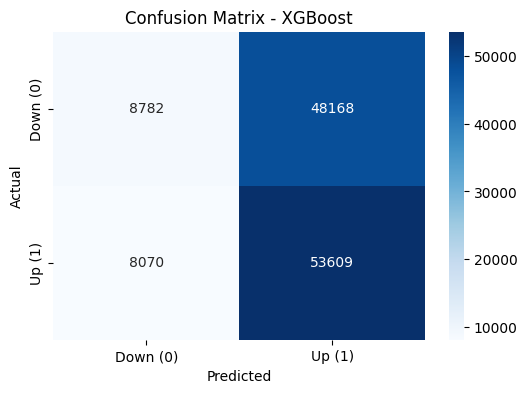

              precision    recall  f1-score   support

    Down (0)       0.52      0.15      0.24     56950
      Up (1)       0.53      0.87      0.66     61679

    accuracy                           0.53    118629
   macro avg       0.52      0.51      0.45    118629
weighted avg       0.52      0.53      0.46    118629



In [15]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

# Load Data
df = pd.read_csv("stock_details_5_years.csv")
df['Date'] = pd.to_datetime(df['Date'], utc=True)
df = df.sort_values(['Company','Date'])

# Target: next-day direction
df['Next_Close'] = df.groupby('Company')['Close'].shift(-1)
df = df.dropna()
df['UpDown'] = (df['Next_Close'] > df['Close']).astype(int)

# Feature Engineering
df['Return'] = (df['Close'] - df['Open']) / df['Open']
df['Prev_Close'] = df.groupby('Company')['Close'].shift(1)
df['Pct_Change'] = (df['Close'] - df['Prev_Close']) / df['Prev_Close']

df['MA5'] = df.groupby('Company')['Close'].transform(lambda x: x.rolling(5).mean())
df['MA10'] = df.groupby('Company')['Close'].transform(lambda x: x.rolling(10).mean())
df['MA20'] = df.groupby('Company')['Close'].transform(lambda x: x.rolling(20).mean())
df['Volatility'] = df.groupby('Company')['Close'].transform(lambda x: x.rolling(10).std())

# RSI
def compute_rsi(series, window=14):
    delta = series.diff()
    gain = (delta.where(delta>0,0)).rolling(window).mean()
    loss = (-delta.where(delta<0,0)).rolling(window).mean()
    rs = gain / loss
    return 100 - (100 / (1+rs))

df['RSI'] = df.groupby('Company')['Close'].transform(compute_rsi)

# MACD
df['EMA12'] = df.groupby('Company')['Close'].transform(lambda x: x.ewm(span=12, adjust=False).mean())
df['EMA26'] = df.groupby('Company')['Close'].transform(lambda x: x.ewm(span=26, adjust=False).mean())
df['MACD'] = df['EMA12'] - df['EMA26']

# Bollinger Bands
df['BB_Mid'] = df['MA20']
df['BB_Upper'] = df['MA20'] + 2*df.groupby('Company')['Close'].transform(lambda x: x.rolling(20).std())
df['BB_Lower'] = df['MA20'] - 2*df.groupby('Company')['Close'].transform(lambda x: x.rolling(20).std())

# OBV
df['OBV'] = (np.sign(df['Close'].diff()) * df['Volume']).fillna(0)
df['OBV'] = df.groupby('Company')['OBV'].cumsum()

df = df.dropna()

# Features
features = ['Open','High','Low','Close','Volume','Return','Pct_Change',
            'MA5','MA10','MA20','Volatility','RSI','MACD','BB_Upper','BB_Lower','OBV']

X = df[features]
y = df['UpDown']

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# Scale (optional for tree-based models)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# XGBoost Classifier
xgb_model = XGBClassifier(
    n_estimators=300,
    max_depth=5,
    learning_rate=0.05,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42,
    use_label_encoder=False,
    eval_metric='logloss'
)

xgb_model.fit(X_train_scaled, y_train)

# Predictions
y_pred = xgb_model.predict(X_test_scaled)
acc = accuracy_score(y_test, y_pred)
print("XGBoost Accuracy:", round(acc*100,2), "%")

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=["Down (0)","Up (1)"],
            yticklabels=["Down (0)","Up (1)"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - XGBoost")
plt.show()

# Classification Report
print(classification_report(y_test, y_pred, target_names=["Down (0)","Up (1)"]))


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [12:51:34] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


XGBoost 3-Day Trend Accuracy: 55.15 %


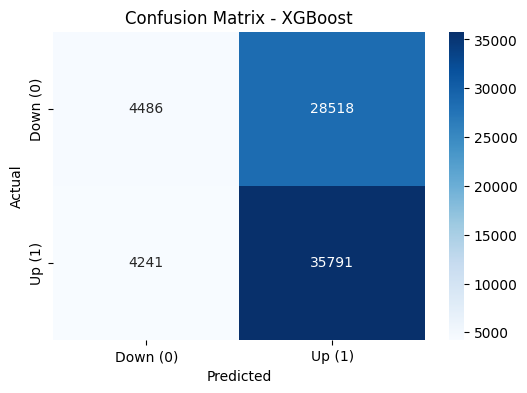

              precision    recall  f1-score   support

    Down (0)       0.51      0.14      0.21     33004
      Up (1)       0.56      0.89      0.69     40032

    accuracy                           0.55     73036
   macro avg       0.54      0.51      0.45     73036
weighted avg       0.54      0.55      0.47     73036



In [2]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

# ------------------ Load Data ------------------
df = pd.read_csv("stock_details_5_years.csv")
df['Date'] = pd.to_datetime(df['Date'], utc=True)
df = df.sort_values(['Company', 'Date'])

# ------------------ Target: Next 3-Day Trend ------------------
df['Next_Close_3'] = df.groupby('Company')['Close'].shift(-3)
df = df.dropna()
df['Trend3'] = (df['Next_Close_3'] > df['Close']).astype(int)  # 1 = up, 0 = down

# ------------------ Feature Engineering ------------------
df['Return'] = (df['Close'] - df['Open']) / df['Open']
df['Prev_Close'] = df.groupby('Company')['Close'].shift(1)
df['Pct_Change'] = (df['Close'] - df['Prev_Close']) / df['Prev_Close']

df['MA5'] = df.groupby('Company')['Close'].transform(lambda x: x.rolling(5).mean())
df['MA10'] = df.groupby('Company')['Close'].transform(lambda x: x.rolling(10).mean())
df['MA20'] = df.groupby('Company')['Close'].transform(lambda x: x.rolling(20).mean())
df['Volatility'] = df.groupby('Company')['Close'].transform(lambda x: x.rolling(10).std())

# RSI
def compute_rsi(series, window=14):
    delta = series.diff()
    gain = (delta.where(delta>0,0)).rolling(window).mean()
    loss = (-delta.where(delta<0,0)).rolling(window).mean()
    rs = gain / loss
    return 100 - (100 / (1+rs))

df['RSI'] = df.groupby('Company')['Close'].transform(compute_rsi)

# MACD
df['EMA12'] = df.groupby('Company')['Close'].transform(lambda x: x.ewm(span=12, adjust=False).mean())
df['EMA26'] = df.groupby('Company')['Close'].transform(lambda x: x.ewm(span=26, adjust=False).mean())
df['MACD'] = df['EMA12'] - df['EMA26']

# Bollinger Bands
df['BB_Upper'] = df['MA20'] + 2*df.groupby('Company')['Close'].transform(lambda x: x.rolling(20).std())
df['BB_Lower'] = df['MA20'] - 2*df.groupby('Company')['Close'].transform(lambda x: x.rolling(20).std())

# OBV
df['OBV'] = (np.sign(df['Close'].diff()) * df['Volume']).fillna(0)
df['OBV'] = df.groupby('Company')['OBV'].cumsum()

df = df.dropna()

# ------------------ Features ------------------
features = ['Open','High','Low','Close','Volume','Return','Pct_Change',
            'MA5','MA10','MA20','Volatility','RSI','MACD','BB_Upper','BB_Lower','OBV']

X = df[features]
y = df['Trend3']

# ------------------ Train/Test Split ------------------
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# ------------------ Scale (optional for tree models) ------------------
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# ------------------ XGBoost Classifier ------------------
xgb_model = XGBClassifier(
    n_estimators=500,
    max_depth=6,
    learning_rate=0.05,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42,
    use_label_encoder=False,
    eval_metric='logloss'
)

xgb_model.fit(X_train_scaled, y_train)

# ------------------ Predictions ------------------
y_pred = xgb_model.predict(X_test_scaled)
acc = accuracy_score(y_test, y_pred)
print("XGBoost 3-Day Trend Accuracy:", round(acc*100,2), "%")

# ------------------ Confusion Matrix ------------------
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=["Down (0)","Up (1)"],
            yticklabels=["Down (0)","Up (1)"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - XGBoost")
plt.show()

# ------------------ Classification Report ------------------
print(classification_report(y_test, y_pred, target_names=["Down (0)","Up (1)"]))


In [7]:
# Option B: Time-series Transformer classifier (PyTorch)
# Install: pip install torch torchvision
import pandas as pd
import numpy as np
import torch
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import StandardScaler

# ---------------- Load and prepare
df = pd.read_csv("stock_details_5_years.csv")
df['Date'] = pd.to_datetime(df['Date'])
df = df.sort_values(['Company','Date'])

# target next day up/down
df['Next_Close'] = df.groupby('Company')['Close'].shift(-1)
df = df.dropna(subset=['Next_Close'])
df['Target'] = (df['Next_Close'] > df['Close']).astype(int)

# features to use (you can expand)
features = ['Open','High','Low','Close','Volume']
# create lag features (optional)
for lag in range(1,6):
    df[f'Lag_Close_{lag}'] = df.groupby('Company')['Close'].shift(lag)
    df[f'Lag_Volume_{lag}'] = df.groupby('Company')['Volume'].shift(lag)
features += [f'Lag_Close_{i}' for i in range(1,6)] + [f'Lag_Volume_{i}' for i in range(1,6)]

df = df.dropna().reset_index(drop=True)

# Sequence window length
SEQ_LEN = 20

# Build sequences per company
sequences = []
targets = []
for comp, g in df.groupby('Company'):
    arr = g[features].values
    t = g['Target'].values
    if len(arr) <= SEQ_LEN:
        continue
    for i in range(SEQ_LEN, len(arr)):
        sequences.append(arr[i-SEQ_LEN:i])   # shape (SEQ_LEN, n_features)
        targets.append(t[i])                 # target at time i

sequences = np.array(sequences)   # (N, SEQ_LEN, n_features)
targets = np.array(targets)

# Train/test split (time-based)
split = int(0.8 * len(sequences))
X_train = sequences[:split]; X_test = sequences[split:]
y_train = targets[:split]; y_test = targets[split:]

# Standardize features (fit on train)
nsamples, slen, nfeat = X_train.shape
scaler = StandardScaler()
X_train_flat = X_train.reshape(-1, nfeat)
X_test_flat  = X_test.reshape(-1, nfeat)
X_train_scaled = scaler.fit_transform(X_train_flat).reshape(-1, slen, nfeat)
X_test_scaled  = scaler.transform(X_test_flat).reshape(-1, slen, nfeat)

# PyTorch Dataset
class SeqDataset(Dataset):
    def __init__(self, X, y):
        self.X = torch.tensor(X, dtype=torch.float32)
        self.y = torch.tensor(y, dtype=torch.long)
    def __len__(self):
        return len(self.X)
    def __getitem__(self, idx):
        return self.X[idx], self.y[idx]

train_ds = SeqDataset(X_train_scaled, y_train)
test_ds  = SeqDataset(X_test_scaled, y_test)
train_loader = DataLoader(train_ds, batch_size=256, shuffle=True)
test_loader  = DataLoader(test_ds, batch_size=512, shuffle=False)

# Transformer model for sequences
class TimeSeriesTransformer(nn.Module):
    def __init__(self, n_features, d_model=64, nhead=4, num_layers=2, dim_feedforward=128, dropout=0.1):
        super().__init__()
        self.input_proj = nn.Linear(n_features, d_model)
        encoder_layer = nn.TransformerEncoderLayer(d_model=d_model, nhead=nhead,
                                                   dim_feedforward=dim_feedforward, dropout=dropout, batch_first=True)
        self.transformer = nn.TransformerEncoder(encoder_layer, num_layers=num_layers)
        self.classifier = nn.Sequential(
            nn.Linear(d_model, 64),
            nn.ReLU(),
            nn.Dropout(0.1),
            nn.Linear(64, 2)
        )
    def forward(self, x):
        # x: (B, SEQ_LEN, n_features)
        x = self.input_proj(x)              # (B, SEQ_LEN, d_model)
        x = self.transformer(x)             # (B, SEQ_LEN, d_model)
        x = x.mean(dim=1)                   # pooled
        return self.classifier(x)

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = TimeSeriesTransformer(n_features=nfeat).to(device)
opt = torch.optim.AdamW(model.parameters(), lr=1e-3, weight_decay=1e-5)
loss_fn = nn.CrossEntropyLoss()

# Training loop (simple)
EPOCHS = 10
for epoch in range(EPOCHS):
    model.train()
    total_loss = 0.0
    for xb, yb in train_loader:
        xb, yb = xb.to(device), yb.to(device)
        out = model(xb)
        loss = loss_fn(out, yb)
        opt.zero_grad()
        loss.backward()
        opt.step()
        total_loss += loss.item() * xb.size(0)
    avg_loss = total_loss / len(train_loader.dataset)
    print(f"Epoch {epoch+1}/{EPOCHS} - Train loss: {avg_loss:.4f}")

# Evaluation
model.eval()
all_preds = []
all_true  = []
with torch.no_grad():
    for xb, yb in test_loader:
        xb = xb.to(device)
        logits = model(xb)
        preds = torch.argmax(logits, dim=1).cpu().numpy()
        all_preds.append(preds)
        all_true.append(yb.numpy())
all_preds = np.concatenate(all_preds)
all_true  = np.concatenate(all_true)

print("Accuracy:", accuracy_score(all_true, all_preds))
print(classification_report(all_true, all_preds))


/tmp/ipython-input-4005864127.py:13: FutureWarning: In a future version of pandas, parsing datetimes with mixed time zones will raise an error unless `utc=True`. Please specify `utc=True` to opt in to the new behaviour and silence this warning. To create a `Series` with mixed offsets and `object` dtype, please use `apply` and `datetime.datetime.strptime`
  df['Date'] = pd.to_datetime(df['Date'])


Epoch 1/10 - Train loss: 0.6926
Epoch 2/10 - Train loss: 0.6924
Epoch 3/10 - Train loss: 0.6924
Epoch 4/10 - Train loss: 0.6924
Epoch 5/10 - Train loss: 0.6924
Epoch 6/10 - Train loss: 0.6924
Epoch 7/10 - Train loss: 0.6924
Epoch 8/10 - Train loss: 0.6924
Epoch 9/10 - Train loss: 0.6924
Epoch 10/10 - Train loss: 0.6924
Accuracy: 0.5192900711623178
              precision    recall  f1-score   support

           0       0.00      0.00      0.00     56743
           1       0.52      1.00      0.68     61297

    accuracy                           0.52    118040
   macro avg       0.26      0.50      0.34    118040
weighted avg       0.27      0.52      0.35    118040



/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [8]:
import pandas as pd

# Load CSV
df = pd.read_csv("stock_details_5_years.csv")
df['Date'] = pd.to_datetime(df['Date'])
df = df.sort_values(["Company", "Date"])

# Generate trend label
df['Next_Close'] = df.groupby('Company')['Close'].shift(-1)
df['Trend'] = (df['Next_Close'] > df['Close']).astype(int)  # 1=Up, 0=Down

# Drop last row of each company (because Next_Close is NaN)
df = df.dropna(subset=['Next_Close'])

print(df[['Date','Company','Close','Next_Close','Trend']].head(15))


/tmp/ipython-input-3664918237.py:5: FutureWarning: In a future version of pandas, parsing datetimes with mixed time zones will raise an error unless `utc=True`. Please specify `utc=True` to opt in to the new behaviour and silence this warning. To create a `Series` with mixed offsets and `object` dtype, please use `apply` and `datetime.datetime.strptime`
  df['Date'] = pd.to_datetime(df['Date'])


                           Date Company      Close  Next_Close  Trend
285   2018-11-29 00:00:00-05:00       A  69.001251   69.753235      1
743   2018-11-30 00:00:00-05:00       A  69.753235   71.989975      1
1201  2018-12-03 00:00:00-05:00       A  71.989975   70.293159      0
1659  2018-12-04 00:00:00-05:00       A  70.293159   69.329056      0
2117  2018-12-06 00:00:00-05:00       A  69.329056   67.728607      0
2575  2018-12-07 00:00:00-05:00       A  67.728607   68.056404      1
3034  2018-12-10 00:00:00-05:00       A  68.056404   68.499901      1
3493  2018-12-11 00:00:00-05:00       A  68.499901   69.174797      1
3952  2018-12-12 00:00:00-05:00       A  69.174797   68.586678      0
4411  2018-12-13 00:00:00-05:00       A  68.586678   66.870560      0
4870  2018-12-14 00:00:00-05:00       A  66.870560   65.414742      0
5329  2018-12-17 00:00:00-05:00       A  65.414742   65.549736      1
5788  2018-12-18 00:00:00-05:00       A  65.549736   64.431374      0
6247  2018-12-19 00:

/tmp/ipython-input-3197323960.py:9: FutureWarning: In a future version of pandas, parsing datetimes with mixed time zones will raise an error unless `utc=True`. Please specify `utc=True` to opt in to the new behaviour and silence this warning. To create a `Series` with mixed offsets and `object` dtype, please use `apply` and `datetime.datetime.strptime`
  df["Date"] = pd.to_datetime(df["Date"])


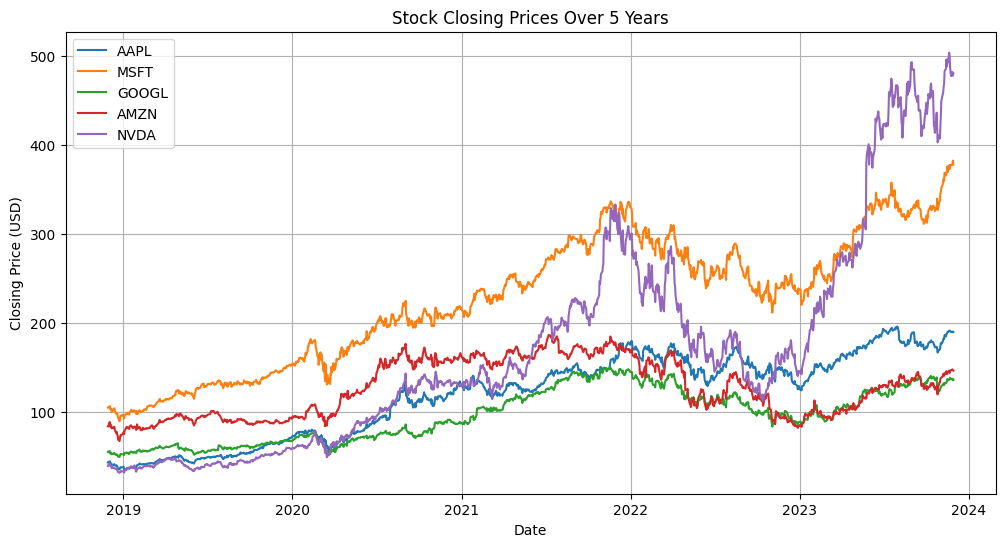

In [10]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the CSV file
file_path = "stock_details_5_years.csv"
df = pd.read_csv(file_path)

# Convert Date column to datetime
df["Date"] = pd.to_datetime(df["Date"])

# Select a few major companies for visualization
companies = ["AAPL", "MSFT", "GOOGL", "AMZN", "NVDA"]

plt.figure(figsize=(12, 6))

for company in companies:
    company_data = df[df["Company"] == company]
    plt.plot(company_data["Date"], company_data["Close"], label=company)

plt.title("Stock Closing Prices Over 5 Years")
plt.xlabel("Date")
plt.ylabel("Closing Price (USD)")
plt.legend()
plt.grid(True)
plt.show()


In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

# Load dataset
df = pd.read_csv("stock_details_5_years.csv")
df["Date"] = pd.to_datetime(df["Date"])

# Choose one company, e.g., Apple (AAPL)
company = "AAPL"
data = df[df["Company"] == company].sort_values("Date")

# Use only the "Close" prices
closing_prices = data["Close"].values.reshape(-1, 1)

# Scale the data for LSTM
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(closing_prices)

# Prepare training data (last 60 days -> next day prediction)
x_train, y_train = [], []
for i in range(60, len(scaled_data)):
    x_train.append(scaled_data[i-60:i, 0])
    y_train.append(scaled_data[i, 0])

x_train, y_train = np.array(x_train), np.array(y_train)
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

# Build LSTM model
model = Sequential([
    LSTM(units=50, return_sequences=True, input_shape=(x_train.shape[1], 1)),
    Dropout(0.2),
    LSTM(units=50, return_sequences=False),
    Dropout(0.2),
    Dense(units=1)  # prediction of closing price
])

model.compile(optimizer="adam", loss="mean_squared_error")
model.fit(x_train, y_train, epochs=10, batch_size=32)

# Prepare test data (last 60 days)
test_inputs = scaled_data[-60:]
x_test = np.reshape(test_inputs, (1, 60, 1))

# Predict next day closing price
predicted_price = model.predict(x_test)
predicted_price = scaler.inverse_transform(predicted_price)

print(f"Predicted next closing price for {company}: {predicted_price[0][0]:.2f} USD")


/tmp/ipython-input-3033087190.py:10: FutureWarning: In a future version of pandas, parsing datetimes with mixed time zones will raise an error unless `utc=True`. Please specify `utc=True` to opt in to the new behaviour and silence this warning. To create a `Series` with mixed offsets and `object` dtype, please use `apply` and `datetime.datetime.strptime`
  df["Date"] = pd.to_datetime(df["Date"])


Epoch 1/10


/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


38/38 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - loss: 0.1123
Epoch 2/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0066
Epoch 3/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0053
Epoch 4/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0045
Epoch 5/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0037
Epoch 6/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0042
Epoch 7/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0042
Epoch 8/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0040
Epoch 9/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0041
Epoch 10/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0039
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 152ms/step
Predicted next closing price for AAPL: 191.42 USD


In [15]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

# Load dataset
df = pd.read_csv("stock_details_5_years.csv")
df["Date"] = pd.to_datetime(df["Date"])

# Take first 5 unique companies
companies = df["Company"].unique()[:5]

predictions = {}

for company in companies:
    print(f"Training model for {company}...")

    # Extract and sort data
    data = df[df["Company"] == company].sort_values("Date")
    closing_prices = data["Close"].values.reshape(-1, 1)

    # Scale data
    scaler = MinMaxScaler(feature_range=(0, 1))
    scaled_data = scaler.fit_transform(closing_prices)

    # Prepare training data (last 60 days -> next day prediction)
    x_train, y_train = [], []
    for i in range(60, len(scaled_data)):
        x_train.append(scaled_data[i-60:i, 0])
        y_train.append(scaled_data[i, 0])

    if len(x_train) == 0:
        continue

    x_train, y_train = np.array(x_train), np.array(y_train)
    x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

    # Build LSTM model
    model = Sequential([
        LSTM(units=50, return_sequences=True, input_shape=(x_train.shape[1], 1)),
        Dropout(0.2),
        LSTM(units=50, return_sequences=False),
        Dropout(0.2),
        Dense(units=1)
    ])

    model.compile(optimizer="adam", loss="mean_squared_error")
    model.fit(x_train, y_train, epochs=5, batch_size=32, verbose=0)

    # Prepare last 60 days for prediction
    test_inputs = scaled_data[-60:]
    x_test = np.reshape(test_inputs, (1, 60, 1))

    # Predict next closing price
    predicted_price = model.predict(x_test)
    predicted_price = scaler.inverse_transform(predicted_price)

    predictions[company] = round(float(predicted_price[0][0]), 2)

print("\nPredicted Next Day Closing Prices (First 5 Companies):")
for company, price in predictions.items():
    print(f"{company}: {price} USD")


/tmp/ipython-input-363657620.py:9: FutureWarning: In a future version of pandas, parsing datetimes with mixed time zones will raise an error unless `utc=True`. Please specify `utc=True` to opt in to the new behaviour and silence this warning. To create a `Series` with mixed offsets and `object` dtype, please use `apply` and `datetime.datetime.strptime`
  df["Date"] = pd.to_datetime(df["Date"])


Training model for AAPL...


/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 167ms/step
Training model for MSFT...


/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 162ms/step
Training model for GOOGL...


/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 250ms/step
Training model for AMZN...


/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 150ms/step
Training model for NVDA...


/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 180ms/step

Predicted Next Day Closing Prices (First 5 Companies):
AAPL: 194.6 USD
MSFT: 356.99 USD
GOOGL: 134.64 USD
AMZN: 146.47 USD
NVDA: 473.01 USD


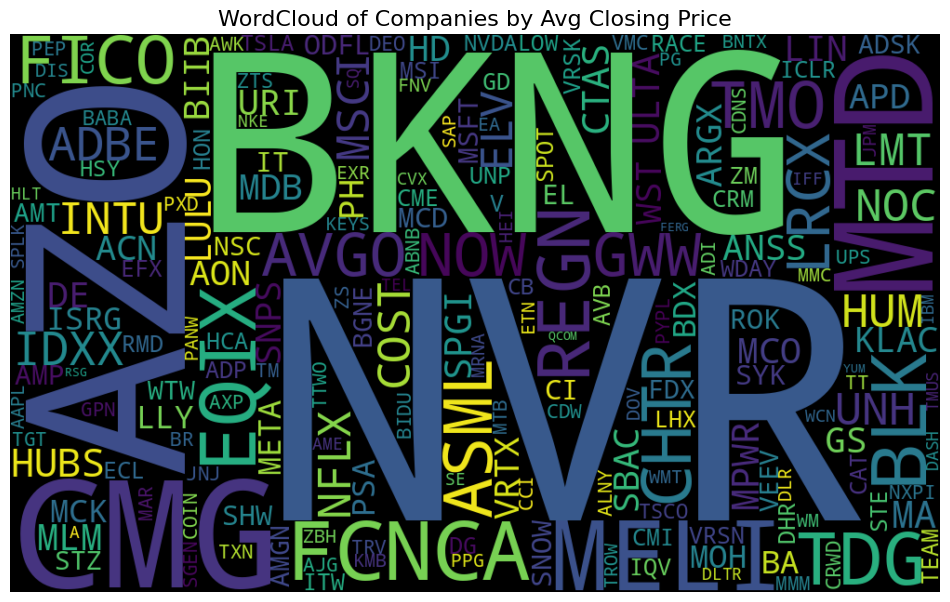

In [16]:
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Load dataset
df = pd.read_csv("stock_details_5_years.csv")

# Calculate average closing price per company
avg_close = df.groupby("Company")["Close"].mean().to_dict()

# Generate word cloud
wc = WordCloud(width=1000, height=600, background_color="black", colormap="viridis")
wc.generate_from_frequencies(avg_close)

# Plot
plt.figure(figsize=(12, 8))
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")
plt.title("WordCloud of Companies by Avg Closing Price", fontsize=16)
plt.show()


In [18]:
import pandas as pd
!pip install vaderSentiment
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

# Example dataset (replace with actual headlines)
data = {
    "Company": ["AAPL", "MSFT", "GOOGL"],
    "Headline": [
        "Apple releases strong quarterly results beating expectations",
        "Microsoft stock dips after earnings miss",
        "Google announces major AI breakthrough"
    ]
}
df = pd.DataFrame(data)

# Sentiment analyzer
analyzer = SentimentIntensityAnalyzer()

# Apply sentiment scoring
df["Sentiment"] = df["Headline"].apply(lambda x: analyzer.polarity_scores(x)["compound"])

print(df)


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.0/126.0 kB 3.7 MB/s eta 0:00:00
  Company                                           Headline  Sentiment
0    AAPL  Apple releases strong quarterly results beatin...     0.0772
1    MSFT           Microsoft stock dips after earnings miss    -0.1531
2   GOOGL             Google announces major AI breakthrough     0.0000


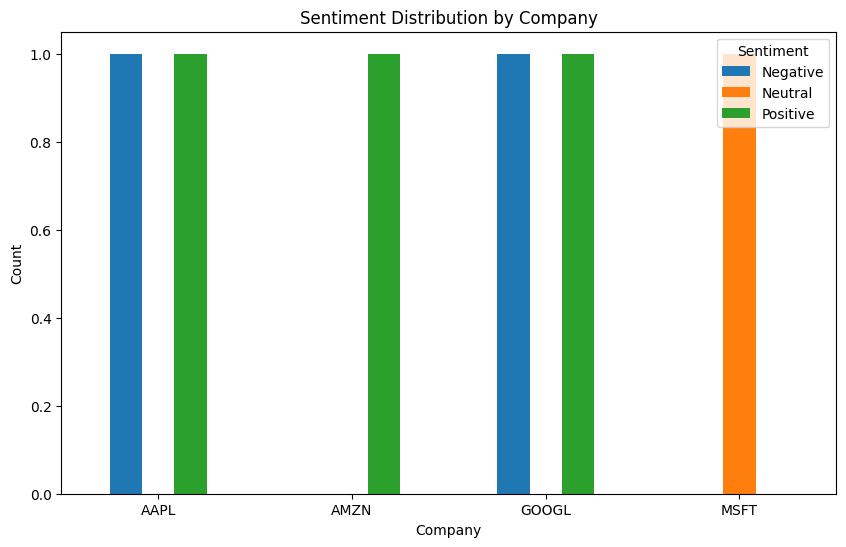

In [19]:
import matplotlib.pyplot as plt

# Example sentiment results
sentiment_data = {
    "Company": ["AAPL", "AAPL", "MSFT", "GOOGL", "GOOGL", "AMZN"],
    "Sentiment": ["Positive", "Negative", "Neutral", "Positive", "Negative", "Positive"]
}
df = pd.DataFrame(sentiment_data)

# Count sentiments
sentiment_counts = df.groupby(["Company", "Sentiment"]).size().unstack().fillna(0)

# Plot
sentiment_counts.plot(kind="bar", figsize=(10,6))
plt.title("Sentiment Distribution by Company")
plt.xlabel("Company")
plt.ylabel("Count")
plt.xticks(rotation=0)
plt.legend(title="Sentiment")
plt.show()


In [20]:
# Install Hugging Face Transformers if not already installed
# !pip install transformers torch

from transformers import AutoTokenizer, AutoModelForSequenceClassification, pipeline

# Load FinBERT (specialized for financial sentiment)
model_name = "ProsusAI/finbert"
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModelForSequenceClassification.from_pretrained(model_name)

# Create sentiment analysis pipeline
finbert = pipeline("sentiment-analysis", model=model, tokenizer=tokenizer)

# Example financial news headlines
texts = [
    "Apple stock soars after record earnings report",
    "Microsoft shares fall due to weak quarterly outlook",
    "Google maintains steady growth in Q3",
    "Amazon disappoints investors with declining profit",
    "Nvidia announces breakthrough in AI chip technology"
]

# Run FinBERT sentiment analysis
results = finbert(texts)

# Print results
for text, result in zip(texts, results):
    print(f"{text} --> {result['label']} (score: {result['score']:.2f})")


tokenizer_config.json:   0%|          | 0.00/252 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/758 [00:00<?, ?B/s]

vocab.txt: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/438M [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/438M [00:00<?, ?B/s]

Device set to use cuda:0


Apple stock soars after record earnings report --> positive (score: 0.46)
Microsoft shares fall due to weak quarterly outlook --> negative (score: 0.97)
Google maintains steady growth in Q3 --> positive (score: 0.95)
Amazon disappoints investors with declining profit --> negative (score: 0.97)
Nvidia announces breakthrough in AI chip technology --> positive (score: 0.67)


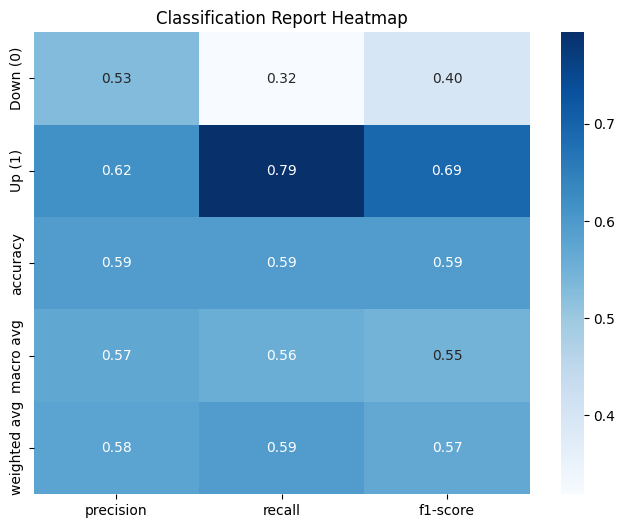

In [12]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report

# Assuming y_test and y_pred are available from the previous cell's execution
# If you re-run this cell, you might need to re-run the previous cell first

# ------------------ Classification Report ------------------
report = classification_report(y_test, y_pred, target_names=["Down (0)", "Up (1)"], output_dict=True)

# Convert to DataFrame
report_df = pd.DataFrame(report).transpose()

# Drop support column for heatmap
report_df = report_df.drop('support', axis=1)

# ------------------ Plot Heatmap ------------------
plt.figure(figsize=(8, 6))
sns.heatmap(report_df, annot=True, cmap='Blues', fmt=".2f")
plt.title("Classification Report Heatmap")
plt.show()

In [13]:
!pip install streamlit yfinance xgboost scikit-learn pandas matplotlib plotly


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.0/10.0 MB 75.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 85.2 MB/s eta 0:00:00


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [16:52:13] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [16:52:13] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [16:52:14] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [16:52:14] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [16:52:15] WARNING: /w

All company models trained successfully.


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/tmp/ipython-input-74801416.py:136: UserWarning: G

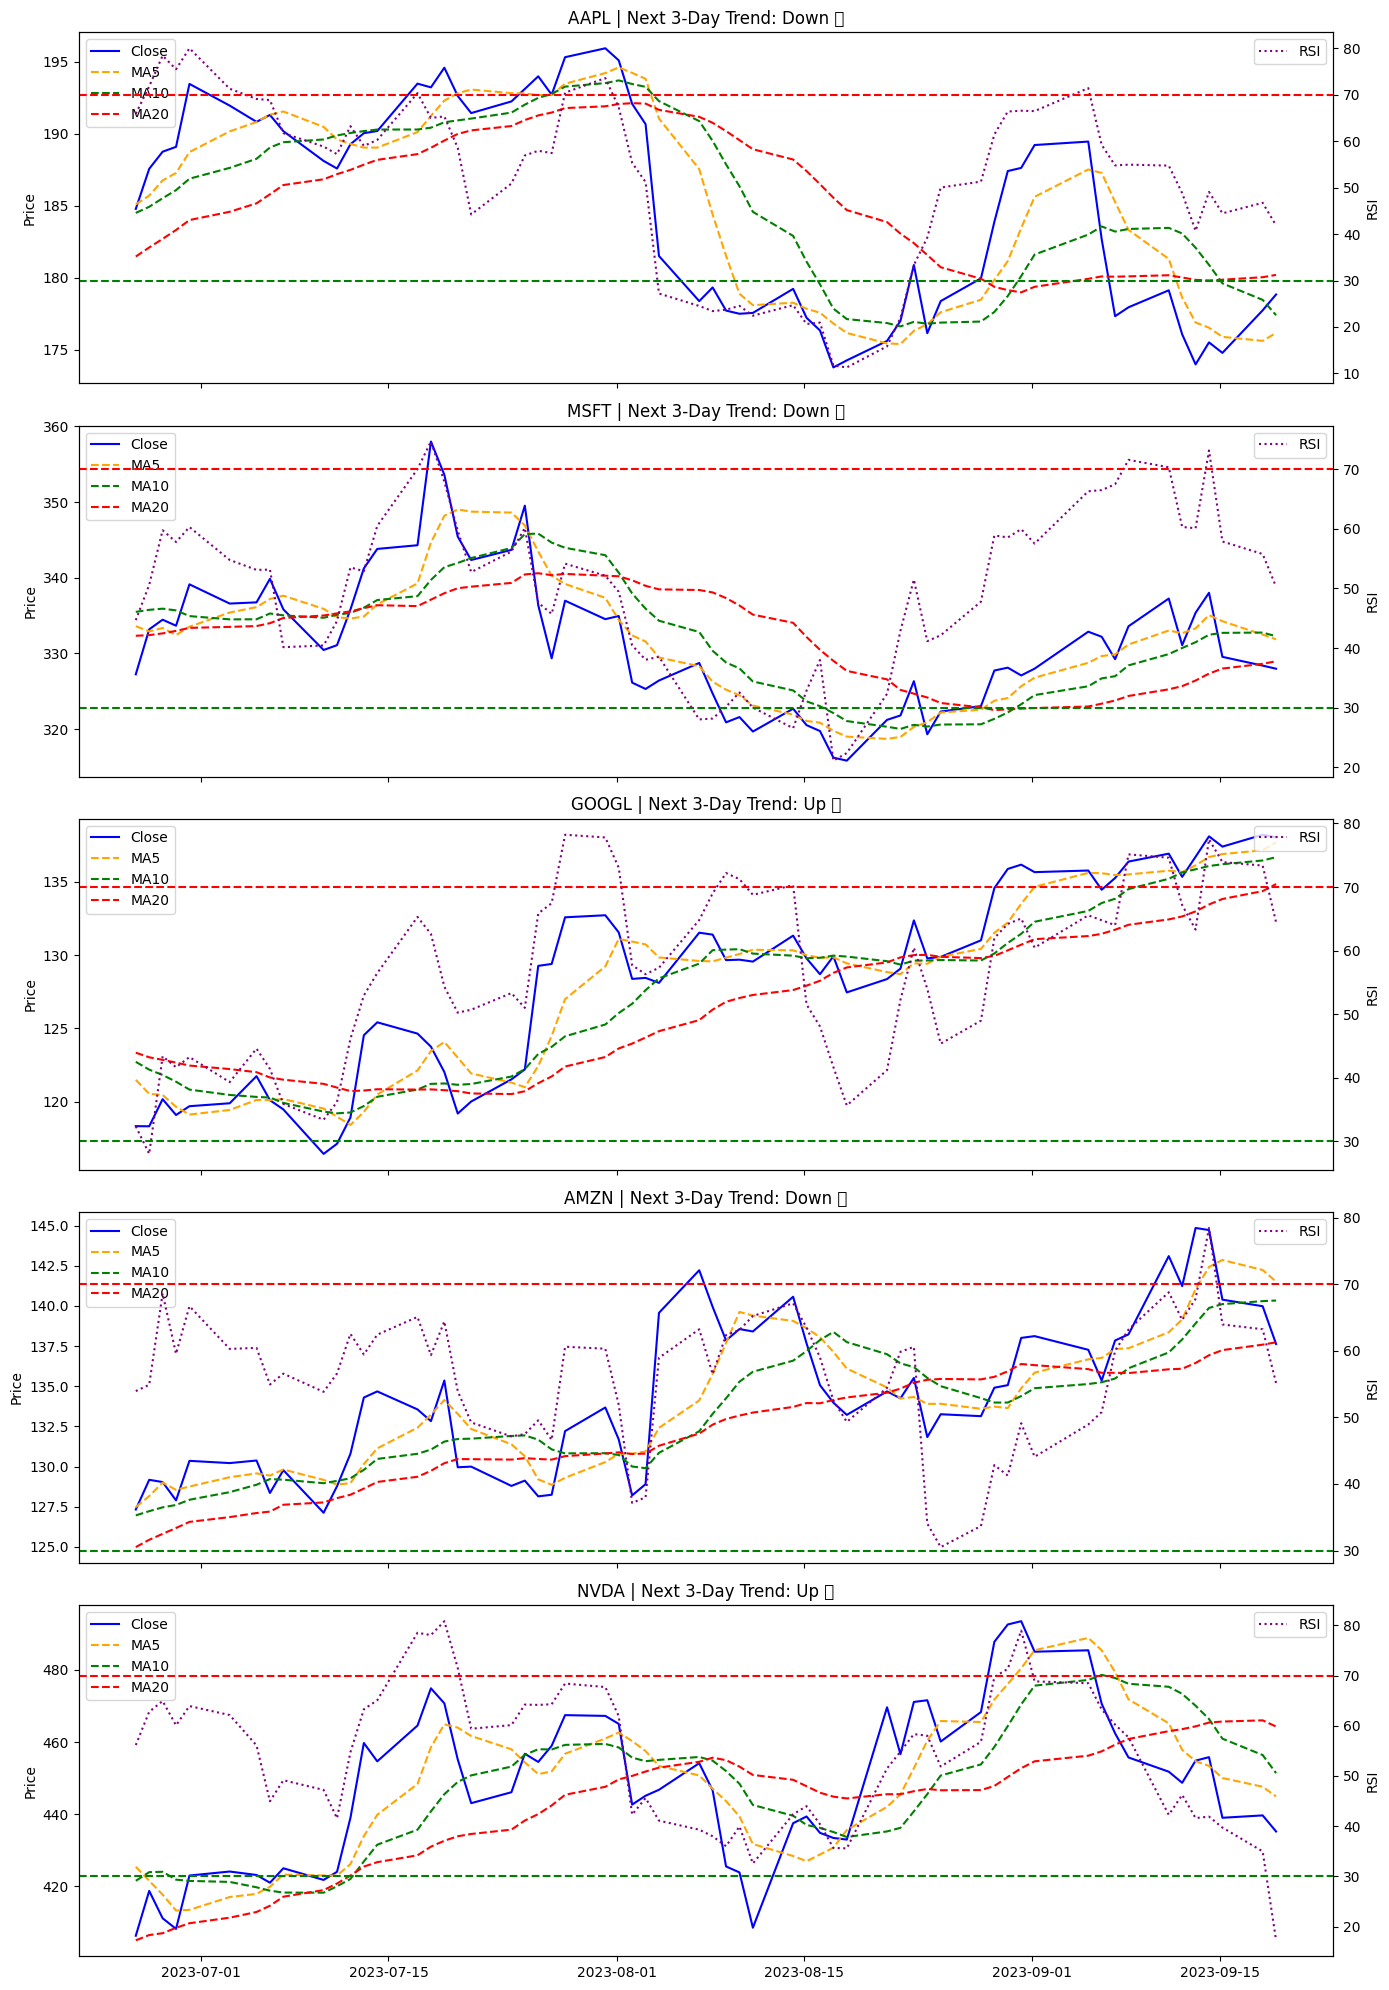

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


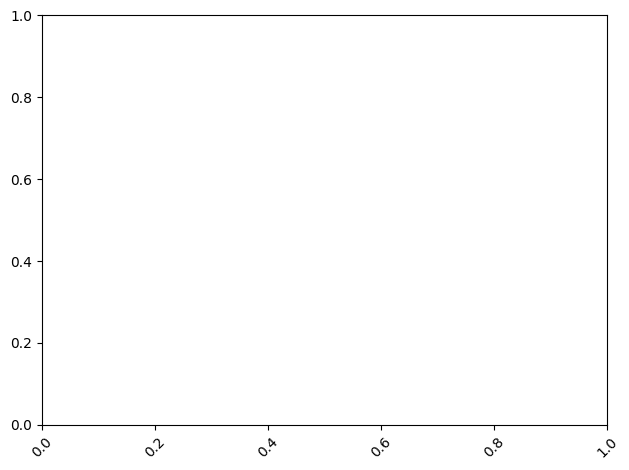

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


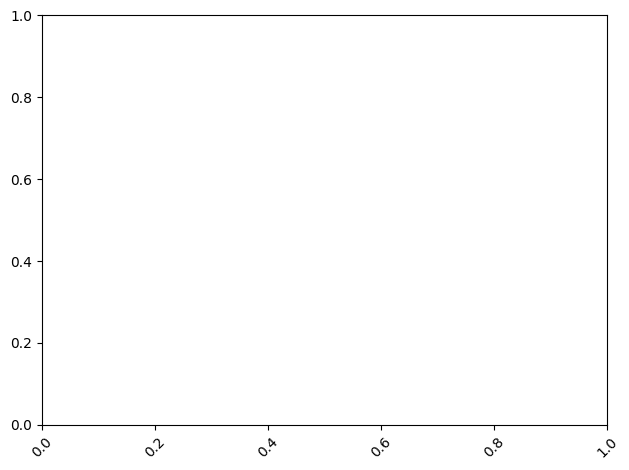

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


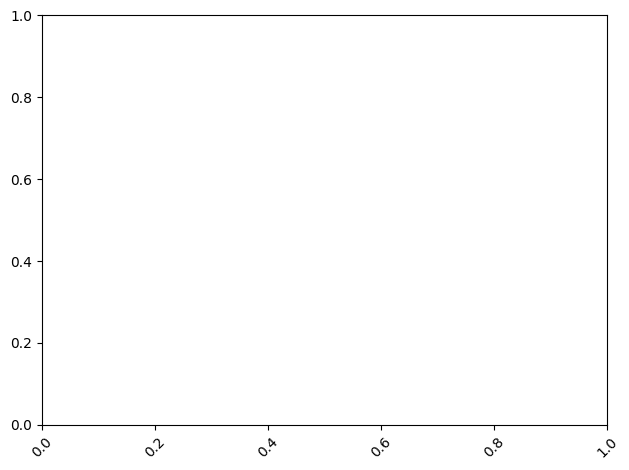

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


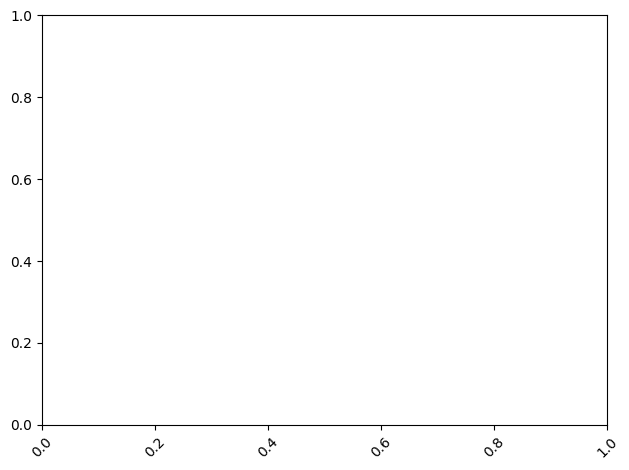

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


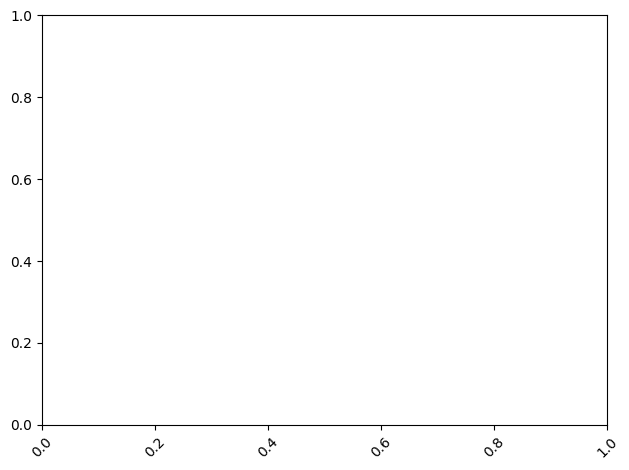

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


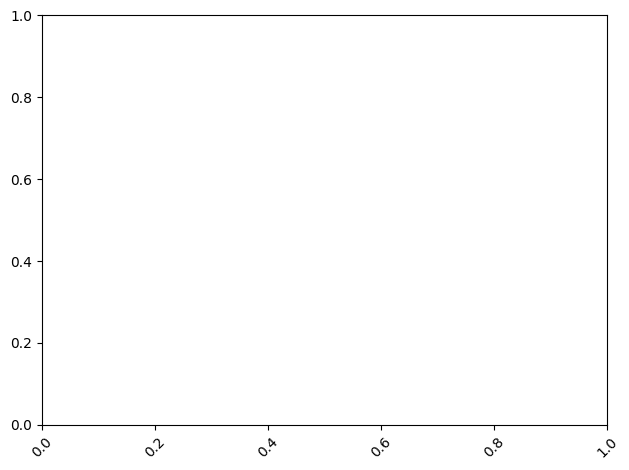

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


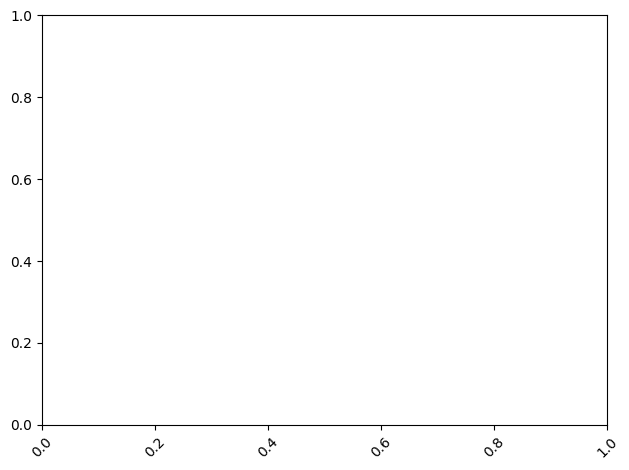

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


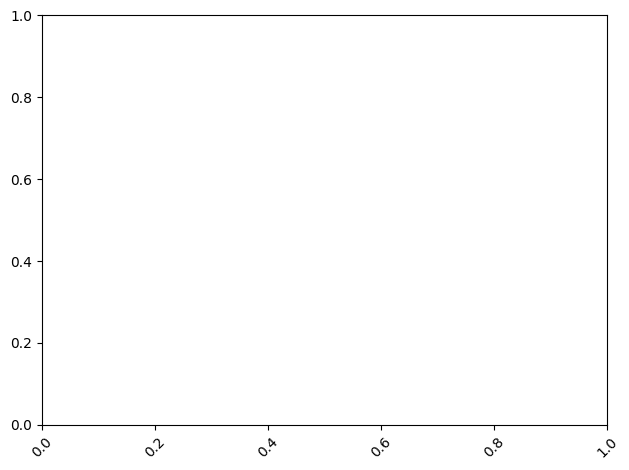

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


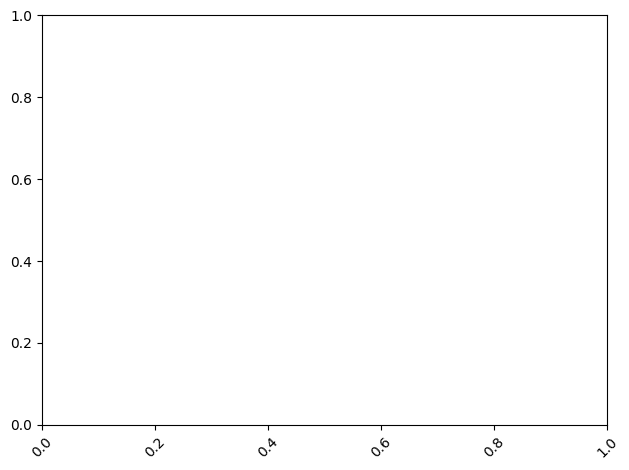

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


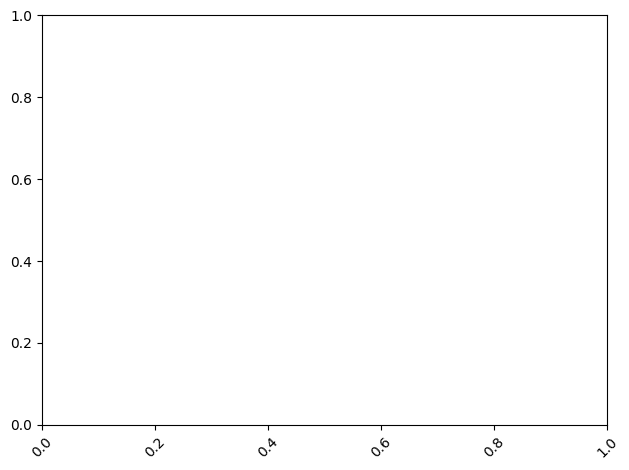

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


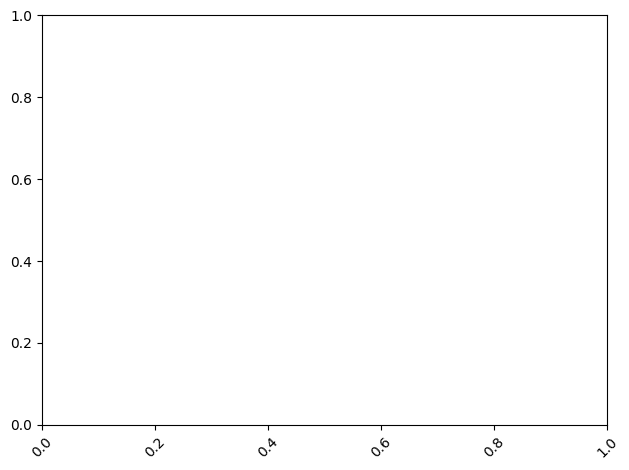

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


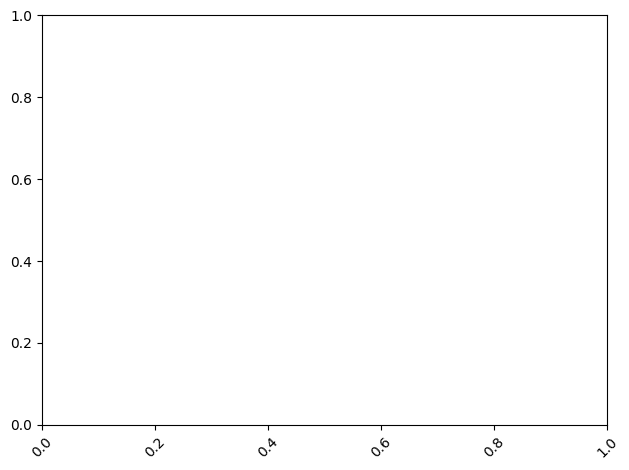

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


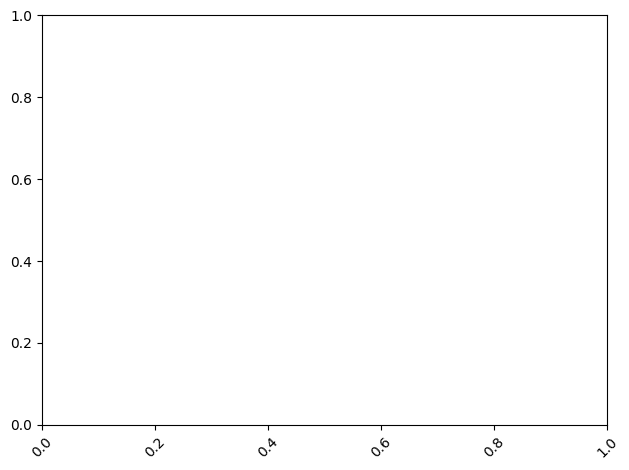

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


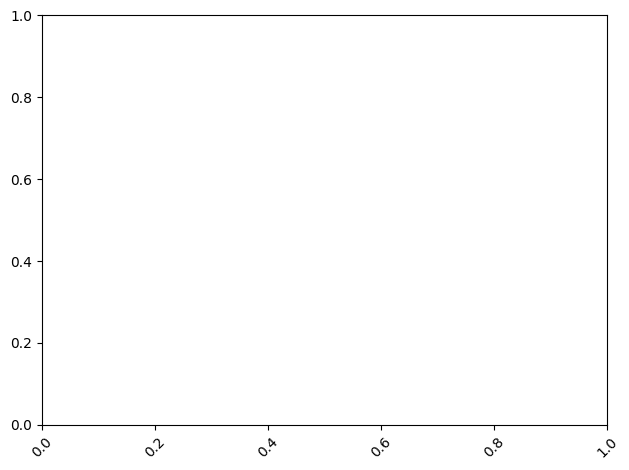

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import time
from xgboost import XGBClassifier
from sklearn.preprocessing import StandardScaler

# ------------------ Feature Engineering (Date preserved) ------------------
def compute_features(df):
    df = df.copy()
    df_numeric = df[['Open','High','Low','Close','Volume']].astype(float)

    df_numeric['Return'] = (df_numeric['Close'] - df_numeric['Open']) / df_numeric['Open']
    df_numeric['Prev_Close'] = df_numeric['Close'].shift(1)
    df_numeric['Pct_Change'] = (df_numeric['Close'] - df_numeric['Prev_Close']) / df_numeric['Prev_Close']

    df_numeric['MA5'] = df_numeric['Close'].rolling(5).mean()
    df_numeric['MA10'] = df_numeric['Close'].rolling(10).mean()
    df_numeric['MA20'] = df_numeric['Close'].rolling(20).mean()
    df_numeric['Volatility'] = df_numeric['Close'].rolling(10).std()

    # RSI
    delta = df_numeric['Close'].diff()
    gain = delta.where(delta>0,0).rolling(14).mean()
    loss = -delta.where(delta<0,0).rolling(14).mean()
    rs = gain / loss
    df_numeric['RSI'] = 100 - (100 / (1 + rs))

    # MACD
    df_numeric['EMA12'] = df_numeric['Close'].ewm(span=12, adjust=False).mean()
    df_numeric['EMA26'] = df_numeric['Close'].ewm(span=26, adjust=False).mean()
    df_numeric['MACD'] = df_numeric['EMA12'] - df_numeric['EMA26']

    # Bollinger Bands
    rolling_std = df_numeric['Close'].rolling(20).std()
    df_numeric['BB_Upper'] = df_numeric['MA20'] + 2 * rolling_std
    df_numeric['BB_Lower'] = df_numeric['MA20'] - 2 * rolling_std

    # OBV
    obv = (np.sign(df_numeric['Close'].diff()) * df_numeric['Volume']).fillna(0)
    df_numeric['OBV'] = obv.cumsum()

    df_numeric = df_numeric.dropna()

    # Preserve Date column
    df_numeric['Date'] = df.loc[df_numeric.index, 'Date']

    return df_numeric

# ------------------ Load CSV ------------------
file_path = "stock_details_5_years.csv"
df_all = pd.read_csv(file_path)
df_all["Date"] = pd.to_datetime(df_all["Date"], utc=True)
df_all = df_all.sort_values(["Company", "Date"])

companies = ["AAPL", "MSFT", "GOOGL", "AMZN", "NVDA"]

# ------------------ Train XGBoost Models ------------------
models = {}
scalers = {}
features = ['Open','High','Low','Close','Volume','Return','Pct_Change',
            'MA5','MA10','MA20','Volatility','RSI','MACD','BB_Upper','BB_Lower','OBV']

for company in companies:
    df = df_all[df_all["Company"]==company].copy()
    df = compute_features(df)

    df['Next_Close_3'] = df['Close'].shift(-3)
    df = df.dropna()
    df['Trend3'] = (df['Next_Close_3'] > df['Close']).astype(int)

    X = df[features]
    y = df['Trend3']

    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)

    model = XGBClassifier(
        n_estimators=200,
        max_depth=4,
        learning_rate=0.05,
        subsample=0.8,
        colsample_bytree=0.8,
        random_state=42,
        use_label_encoder=False,
        eval_metric='logloss'
    )
    model.fit(X_scaled, y)

    models[company] = model
    scalers[company] = scaler

print("All company models trained successfully.")

# ------------------ Real-Time Visualization ------------------
plt.ion()
fig, axes = plt.subplots(len(companies), 1, figsize=(14, 4*len(companies)), sharex=True)

while True:
    try:
        for i, company in enumerate(companies):
            df = df_all[df_all["Company"]==company].copy()
            df = compute_features(df)

            # Use last 60 rows for faster plotting
            df = df.tail(60)

            latest_features = df[features].iloc[-1:].values
            latest_scaled = scalers[company].transform(latest_features)
            trend_pred = models[company].predict(latest_scaled)[0]

            axes[i].clear()

            # Set Date as index
            df.set_index("Date", inplace=True)

            # Plot Close + MAs
            axes[i].plot(df.index, df['Close'], label='Close', color='blue')
            axes[i].plot(df.index, df['MA5'], label='MA5', linestyle='--', color='orange')
            axes[i].plot(df.index, df['MA10'], label='MA10', linestyle='--', color='green')
            axes[i].plot(df.index, df['MA20'], label='MA20', linestyle='--', color='red')

            # Plot RSI in secondary y-axis
            axes_rsi = axes[i].twinx()
            axes_rsi.plot(df.index, df['RSI'], label='RSI', color='purple', linestyle=':')
            axes_rsi.axhline(70, color='red', linestyle='--')
            axes_rsi.axhline(30, color='green', linestyle='--')
            axes_rsi.set_ylabel('RSI')

            axes[i].set_ylabel('Price')
            axes[i].set_title(f"{company} | Next 3-Day Trend: {'Up 📈' if trend_pred==1 else 'Down 📉'}")
            axes[i].legend(loc='upper left')
            axes_rsi.legend(loc='upper right')

        plt.xticks(rotation=45)
        plt.tight_layout()
        plt.pause(0.1)
        time.sleep(10)

    except Exception as e:
        print("Error updating visualization:", e)
        time.sleep(10)


In [ ]:
# Main Plot (Price + Moving Averages)

#Blue line → Close price
#Shows the actual closing price of the stock.

#Orange dashed → MA5 (5-day moving average)
#Shows the short-term trend of the stock.

#Green dashed → MA10 (10-day moving average)
#Shows medium-term trend.

#Red dashed → MA20 (20-day moving average)
#Shows longer-term trend.

/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [18:00:02] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [18:00:03] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [18:00:03] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [18:00:04] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [18:00:04] WARNING: /w

Next-day models trained successfully.


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/tmp/ipython-input-1963953450.py:127: UserWarning:

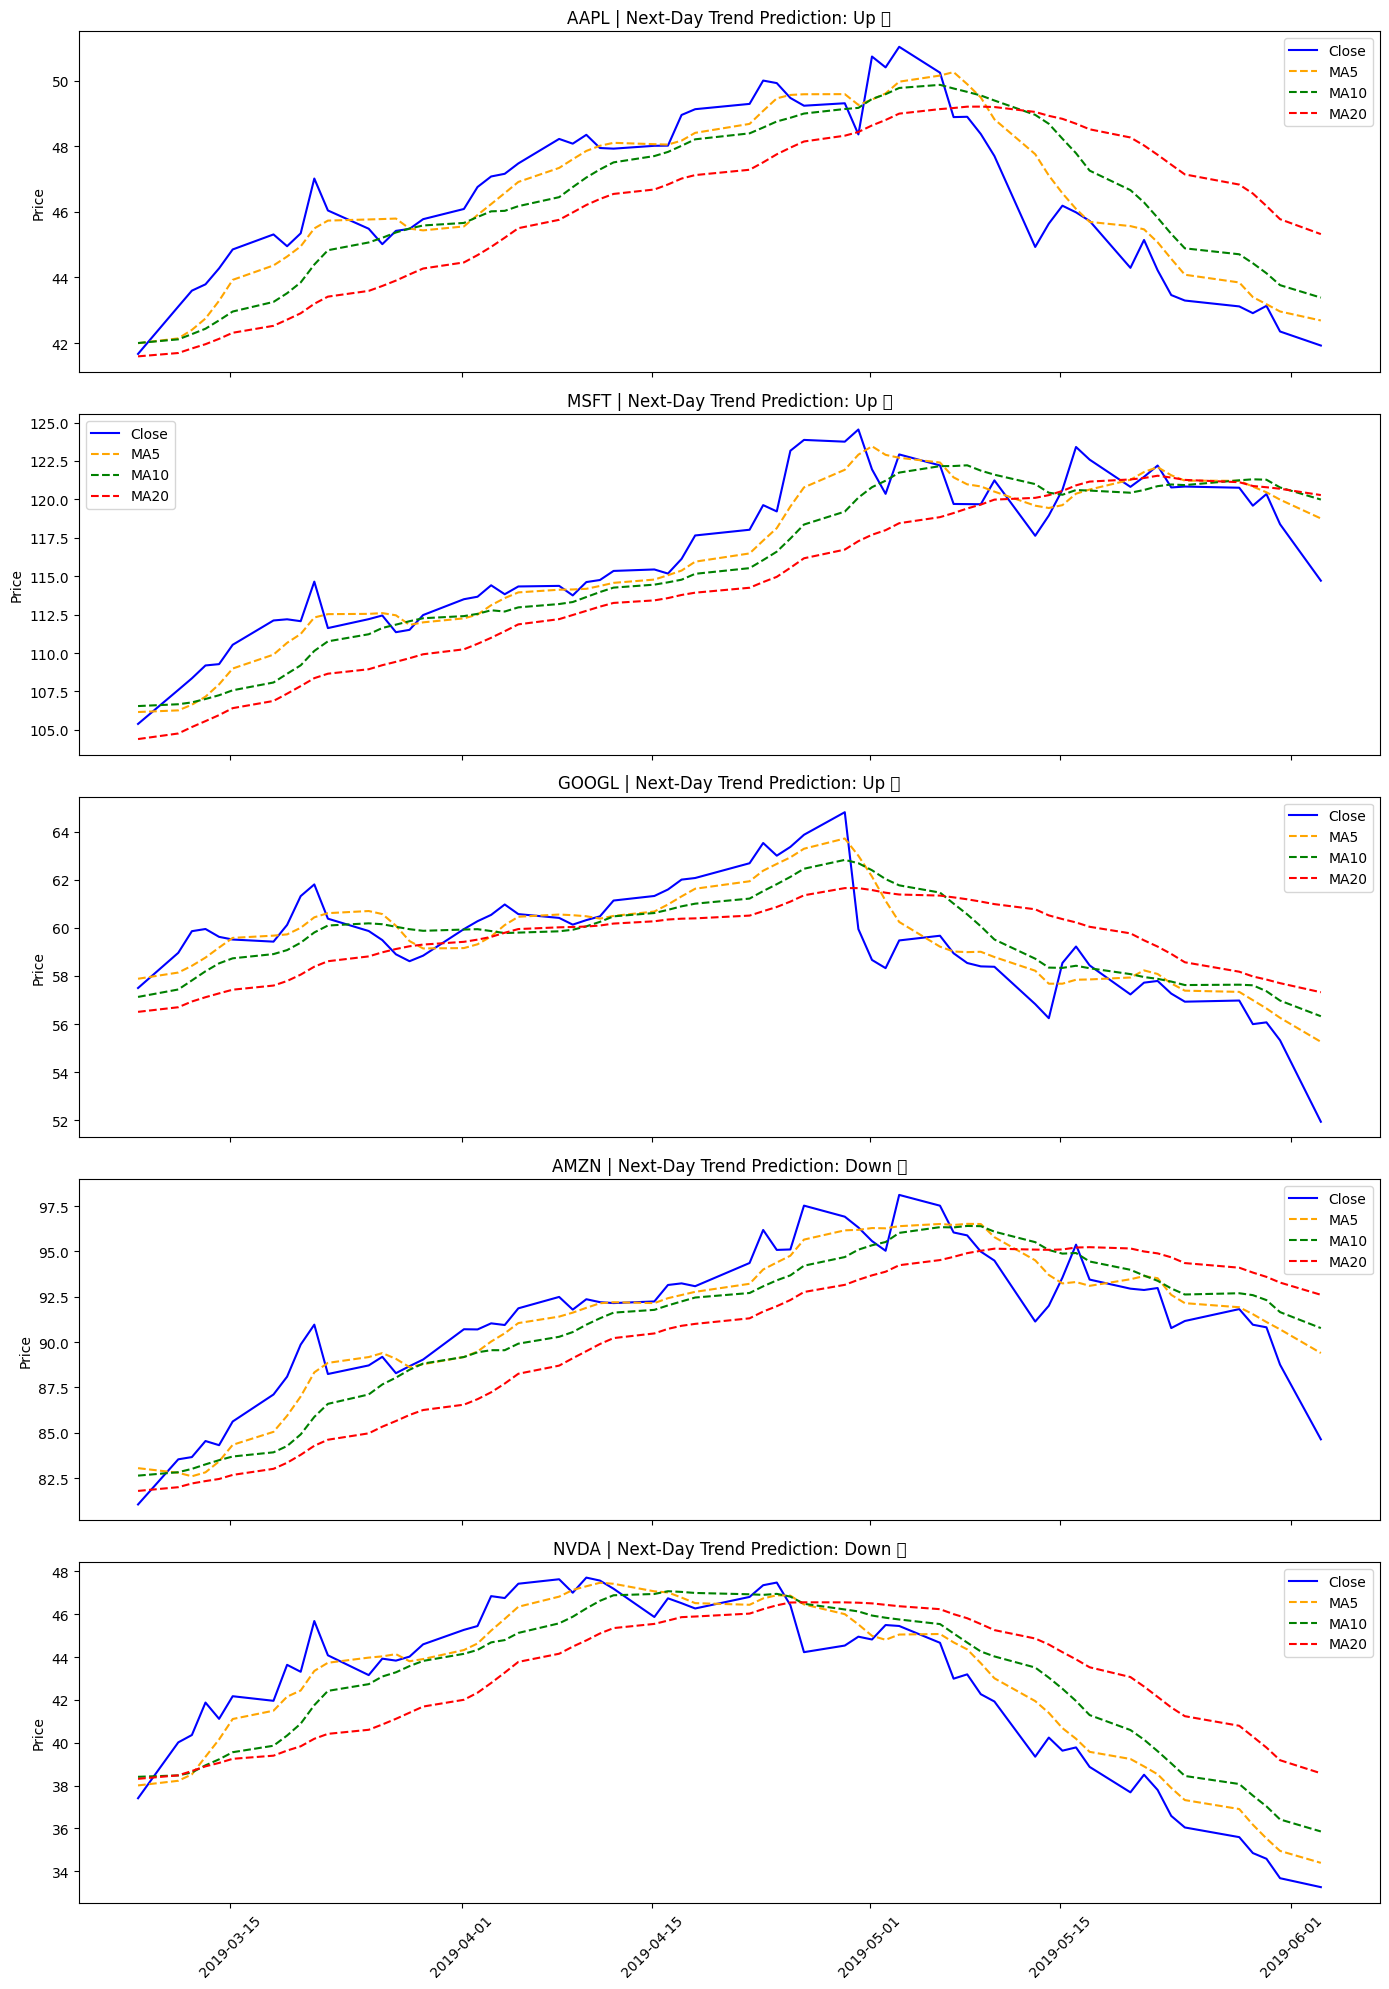

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


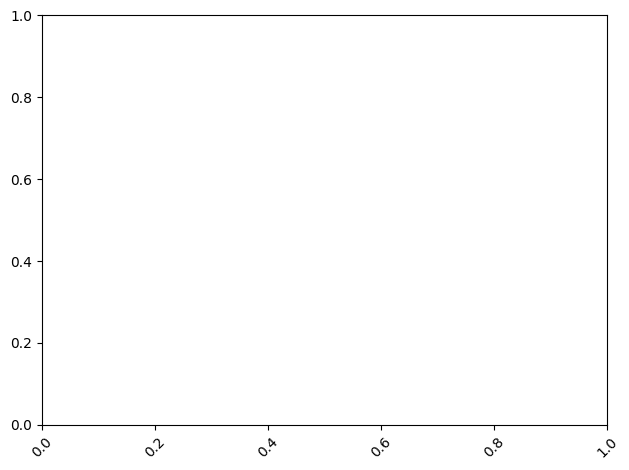

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


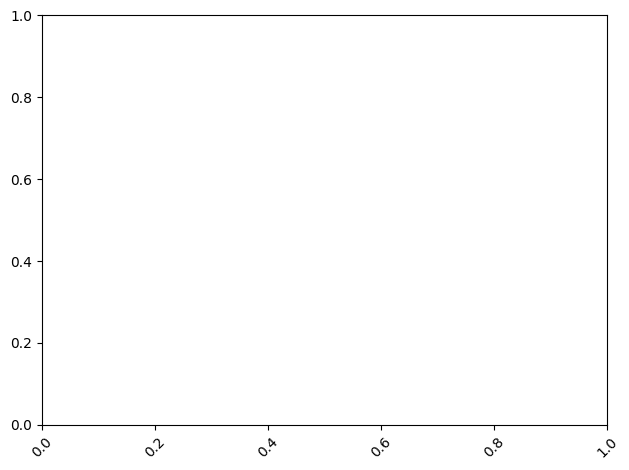

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


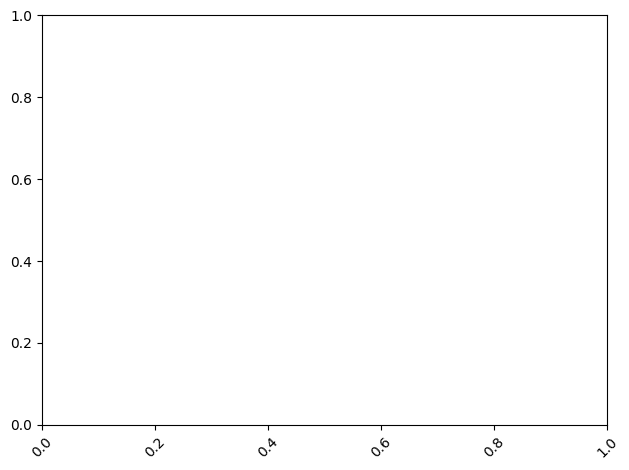

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


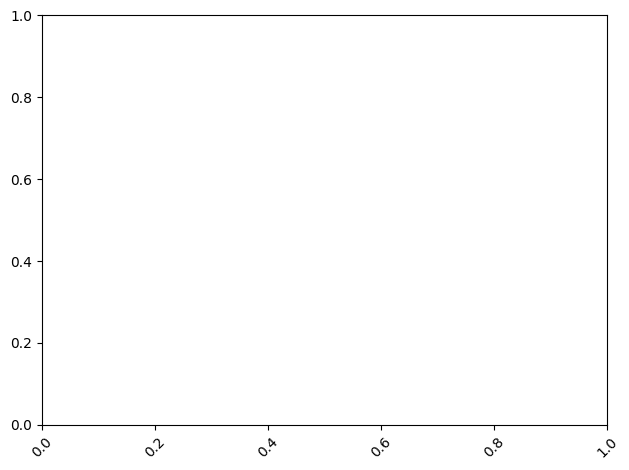

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


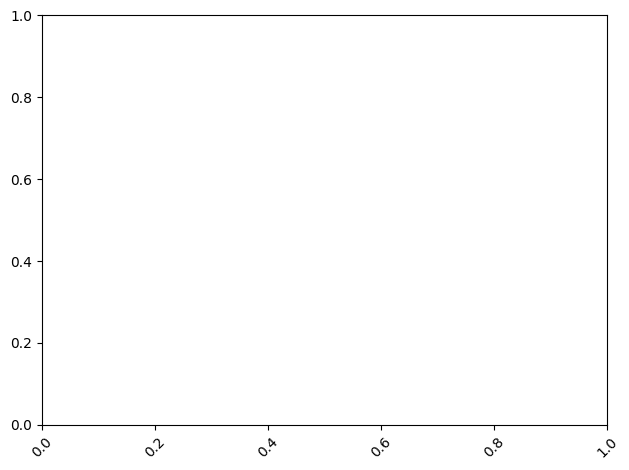

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


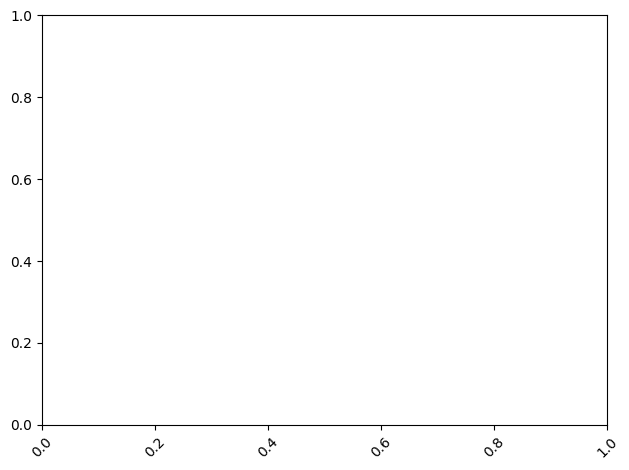

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


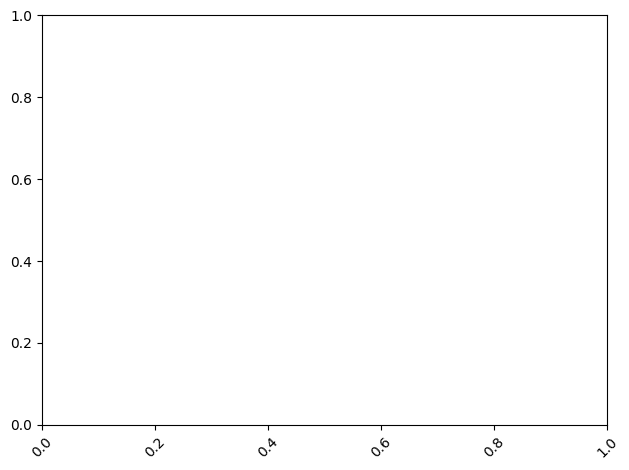

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


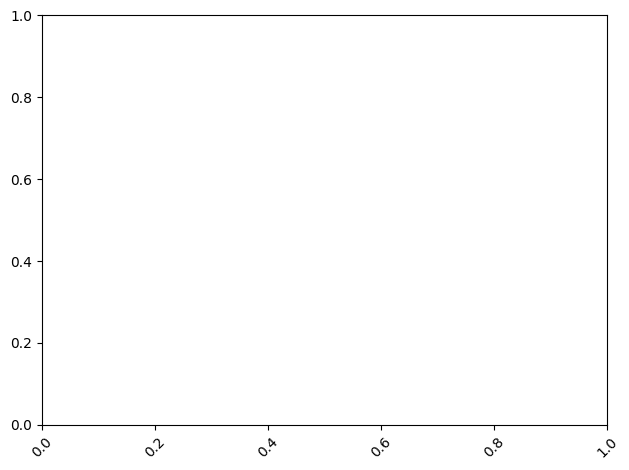

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


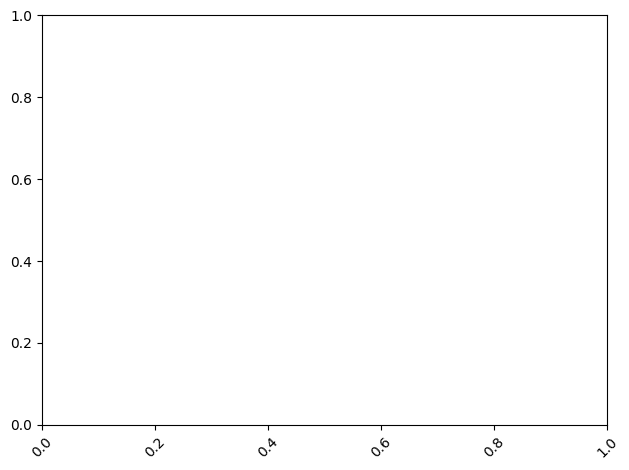

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


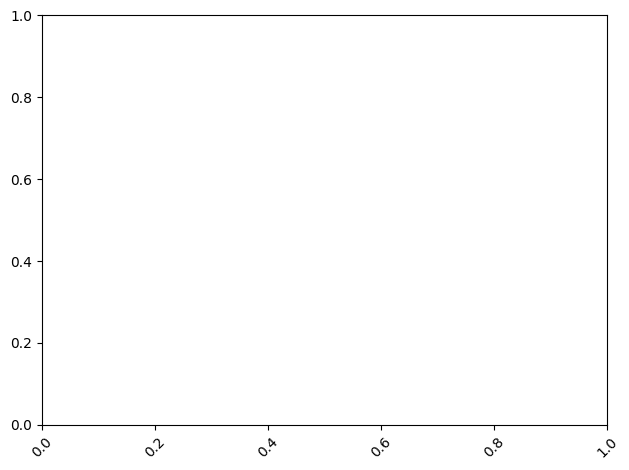

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


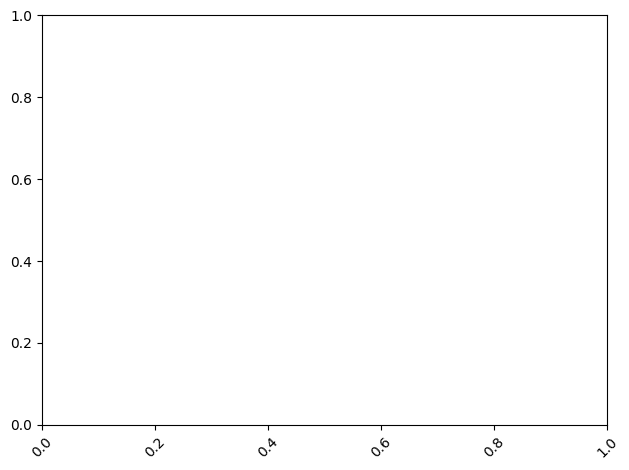

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


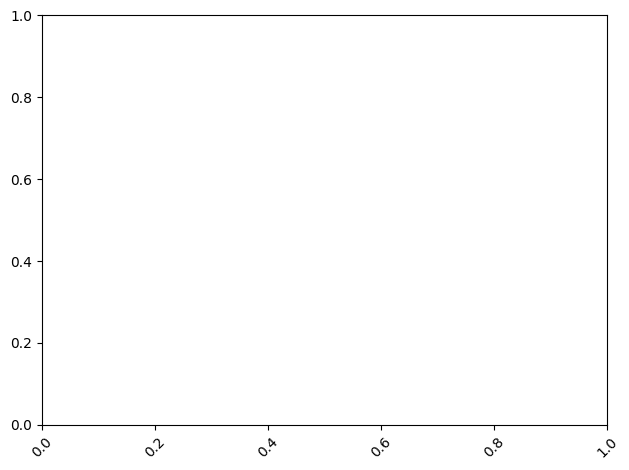

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


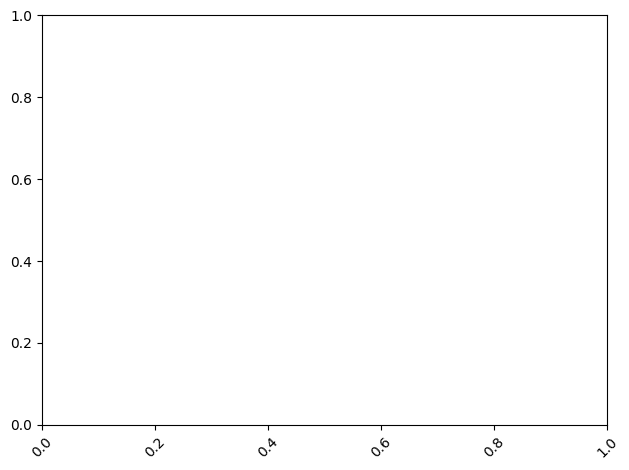

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


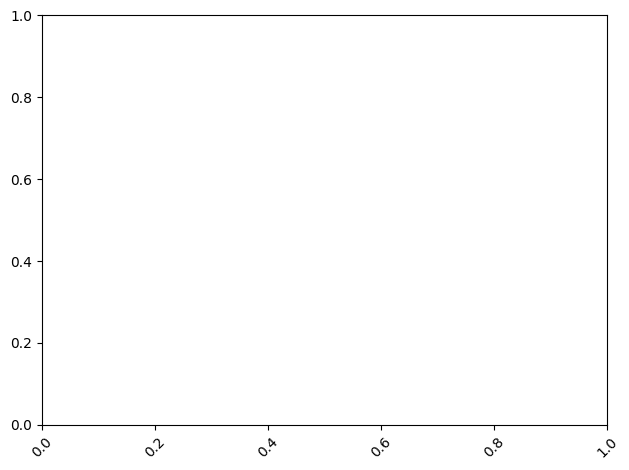

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


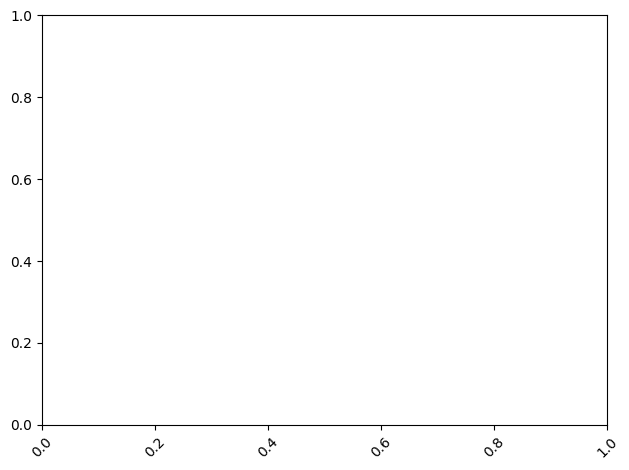

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


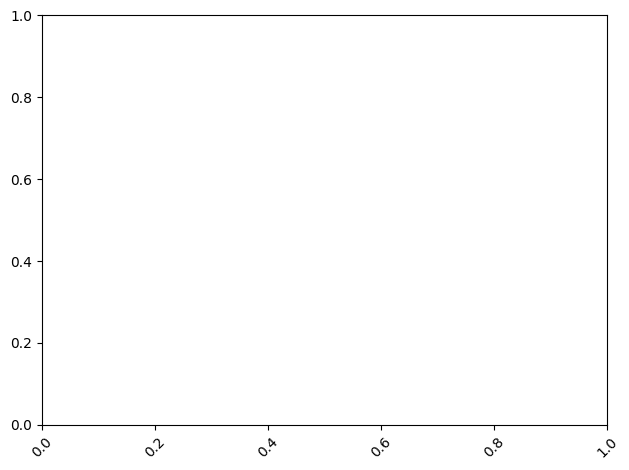

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


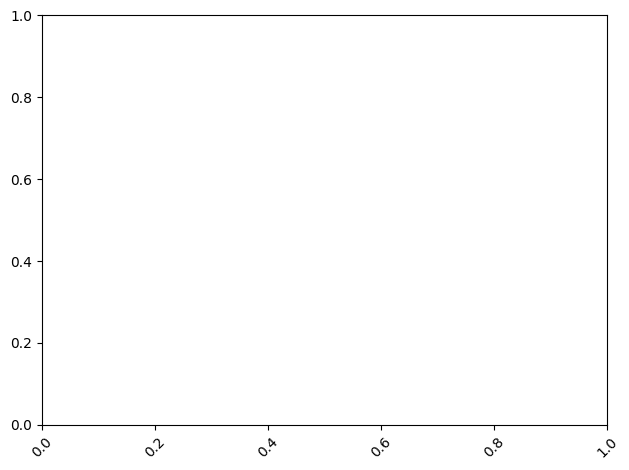

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


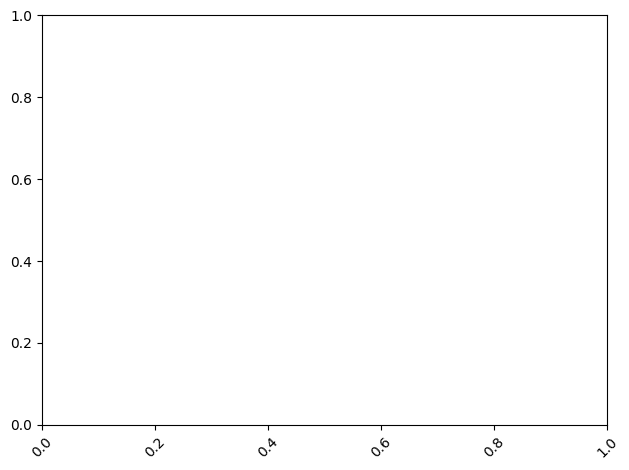

KeyboardInterrupt: 

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import time
from xgboost import XGBClassifier
from sklearn.preprocessing import StandardScaler

# ------------------ Feature Engineering ------------------
def compute_features(df):
    df = df.copy()
    df_numeric = df[['Open','High','Low','Close','Volume']].astype(float)

    df_numeric['Return'] = (df_numeric['Close'] - df_numeric['Open']) / df_numeric['Open']
    df_numeric['Prev_Close'] = df_numeric['Close'].shift(1)
    df_numeric['Pct_Change'] = (df_numeric['Close'] - df_numeric['Prev_Close']) / df_numeric['Prev_Close']

    df_numeric['MA5'] = df_numeric['Close'].rolling(5).mean()
    df_numeric['MA10'] = df_numeric['Close'].rolling(10).mean()
    df_numeric['MA20'] = df_numeric['Close'].rolling(20).mean()
    df_numeric['Volatility'] = df_numeric['Close'].rolling(10).std()

    # RSI
    delta = df_numeric['Close'].diff()
    gain = delta.where(delta>0,0).rolling(14).mean()
    loss = -delta.where(delta<0,0).rolling(14).mean()
    rs = gain / loss
    df_numeric['RSI'] = 100 - (100 / (1 + rs))

    # MACD
    df_numeric['EMA12'] = df_numeric['Close'].ewm(span=12, adjust=False).mean()
    df_numeric['EMA26'] = df_numeric['Close'].ewm(span=26, adjust=False).mean()
    df_numeric['MACD'] = df_numeric['EMA12'] - df_numeric['EMA26']

    # Bollinger Bands
    rolling_std = df_numeric['Close'].rolling(20).std()
    df_numeric['BB_Upper'] = df_numeric['MA20'] + 2 * rolling_std
    df_numeric['BB_Lower'] = df_numeric['MA20'] - 2 * rolling_std

    # OBV
    obv = (np.sign(df_numeric['Close'].diff()) * df_numeric['Volume']).fillna(0)
    df_numeric['OBV'] = obv.cumsum()

    df_numeric = df_numeric.dropna()

    # Preserve Date column
    df_numeric['Date'] = df.loc[df_numeric.index, 'Date']

    return df_numeric

# ------------------ Load CSV ------------------
file_path = "stock_details_5_years.csv"
df_all = pd.read_csv(file_path)
df_all["Date"] = pd.to_datetime(df_all["Date"], utc=True)
df_all = df_all.sort_values(["Company", "Date"])

companies = ["AAPL", "MSFT", "GOOGL", "AMZN", "NVDA"]

# ------------------ Train XGBoost Models for Next-Day Prediction ------------------
models = {}
scalers = {}
features = ['Open','High','Low','Close','Volume','Return','Pct_Change',
            'MA5','MA10','MA20','Volatility','RSI','MACD','BB_Upper','BB_Lower','OBV']

for company in companies:
    df = df_all[df_all["Company"]==company].copy()
    df = compute_features(df)

    # Target: Next-Day Trend
    df['Next_Close_1'] = df['Close'].shift(-1)
    df = df.dropna()
    df['Trend1'] = (df['Next_Close_1'] > df['Close']).astype(int)

    X = df[features]
    y = df['Trend1']

    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)

    model = XGBClassifier(
        n_estimators=200,
        max_depth=4,
        learning_rate=0.05,
        subsample=0.8,
        colsample_bytree=0.8,
        random_state=42,
        use_label_encoder=False,
        eval_metric='logloss'
    )
    model.fit(X_scaled, y)

    models[company] = model
    scalers[company] = scaler

print("Next-day models trained successfully.")

# ------------------ Real-Time Dashboard ------------------
plt.ion()
fig, axes = plt.subplots(len(companies), 1, figsize=(14, 4*len(companies)), sharex=True)

while True:
    try:
        for i, company in enumerate(companies):
            df = df_all[df_all["Company"]==company].copy()
            df = compute_features(df)

            # Last 60 rows for display
            df = df.tail(60)

            latest_features = df[features].iloc[-1:].values
            latest_scaled = scalers[company].transform(latest_features)
            trend_pred = models[company].predict(latest_scaled)[0]

            axes[i].clear()
            df.set_index("Date", inplace=True)

            # Plot Close price + MAs
            axes[i].plot(df.index, df['Close'], label='Close', color='blue')
            axes[i].plot(df.index, df['MA5'], label='MA5', linestyle='--', color='orange')
            axes[i].plot(df.index, df['MA10'], label='MA10', linestyle='--', color='green')
            axes[i].plot(df.index, df['MA20'], label='MA20', linestyle='--', color='red')

            axes[i].set_ylabel('Price')
            axes[i].set_title(f"{company} | Next-Day Trend Prediction: {'Up 📈' if trend_pred==1 else 'Down 📉'}")
            axes[i].legend()

        plt.xticks(rotation=45)
        plt.tight_layout()
        plt.pause(0.1)
        time.sleep(10)

    except Exception as e:
        print("Error updating visualization:", e)
        time.sleep(10)


In [3]:
import pandas as pd
import numpy as np

# Example data
company = "AAPL"
trend_pred = 1  # 1 = Up, 0 = Down
rsi = 55        # latest RSI value
user_ratings = [4,5,3,4]  # scale 1-5

# Average rating
avg_rating = np.mean(user_ratings)

# Recommendation rules
def recommend(trend_pred, rsi, avg_rating):
    if trend_pred == 1 and avg_rating > 3 and rsi < 70:
        return "Buy ✅"
    elif trend_pred == 0 or avg_rating <= 3 or rsi > 70:
        return "Not Buy ❌"
    elif rsi < 30 and trend_pred == 1:
        return "Buy ✅"
    else:
        return "Hold ⚠️"

rec = recommend(trend_pred, rsi, avg_rating)
print(f"Recommendation for {company}: {rec}")


Recommendation for AAPL: Buy ✅


In [11]:
# List of companies
companies = ["AAPL", "MSFT", "GOOGL", "AMZN", "NVDA"]

# Dictionary to store user ratings
user_ratings = {}

# Ask the user to input ratings for each company
print("Please give your rating for each stock (1-5):")
for company in companies:
    while True:
        try:
            rating = float(input(f"{company}: "))
            if 1 <= rating <= 5:
                user_ratings[company] = rating
                break
            else:
                print("Rating must be between 1 and 5.")
        except ValueError:
            print("Please enter a valid number.")

# Recommendation function based on rating thresholds
def recommend(user_rating):
    if user_rating < 2.5:
        return "Not Buy ❌"
    elif 2.5 <= user_rating <= 3.5:
        return "Neutral ⚠️"
    else:  # rating > 3.5
        return "Buy ✅"

# Generate recommendations
print("\n--- Stock Recommendations ---")
for company, rating in user_ratings.items():
    rec = recommend(rating)
    print(f"{company} | Rating: {rating} | Recommendation: {rec}")


Please give your rating for each stock (1-5):
AAPL: 1
MSFT: 2.5
GOOGL: 3.7
AMZN: 1
NVDA: 5

--- Stock Recommendations ---
AAPL | Rating: 1.0 | Recommendation: Not Buy ❌
MSFT | Rating: 2.5 | Recommendation: Neutral ⚠️
GOOGL | Rating: 3.7 | Recommendation: Buy ✅
AMZN | Rating: 1.0 | Recommendation: Not Buy ❌
NVDA | Rating: 5.0 | Recommendation: Buy ✅


In [12]:
import pandas as pd
import numpy as np
from xgboost import XGBClassifier
from sklearn.preprocessing import StandardScaler

# ------------------ Feature Engineering ------------------
def compute_features(df):
    df = df.copy()
    df['Return'] = (df['Close'] - df['Open']) / df['Open']
    df['Prev_Close'] = df['Close'].shift(1)
    df['Pct_Change'] = (df['Close'] - df['Prev_Close']) / df['Prev_Close']

    df['MA5'] = df['Close'].rolling(5).mean()
    df['MA10'] = df['Close'].rolling(10).mean()
    df['MA20'] = df['Close'].rolling(20).mean()
    df['Volatility'] = df['Close'].rolling(10).std()

    # RSI
    delta = df['Close'].diff()
    gain = delta.where(delta>0,0).rolling(14).mean()
    loss = -delta.where(delta<0,0).rolling(14).mean()
    rs = gain / loss
    df['RSI'] = 100 - (100 / (1 + rs))

    # MACD
    df['EMA12'] = df['Close'].ewm(span=12, adjust=False).mean()
    df['EMA26'] = df['Close'].ewm(span=26, adjust=False).mean()
    df['MACD'] = df['EMA12'] - df['EMA26']

    # Bollinger Bands
    rolling_std = df['Close'].rolling(20).std()
    df['BB_Upper'] = df['MA20'] + 2 * rolling_std
    df['BB_Lower'] = df['MA20'] - 2 * rolling_std

    # OBV
    df['OBV'] = (np.sign(df['Close'].diff()) * df['Volume']).fillna(0).cumsum()

    df = df.dropna()
    return df

# ------------------ Load CSV ------------------
file_path = "stock_details_5_years.csv"
df_all = pd.read_csv(file_path)
df_all["Date"] = pd.to_datetime(df_all["Date"], utc=True)
df_all = df_all.sort_values(["Company","Date"])

companies = ["AAPL", "MSFT", "GOOGL", "AMZN", "NVDA"]

# ------------------ Train XGBoost Models ------------------
models = {}
scalers = {}
features = ['Open','High','Low','Close','Volume','Return','Pct_Change',
            'MA5','MA10','MA20','Volatility','RSI','MACD','BB_Upper','BB_Lower','OBV']

for company in companies:
    df = df_all[df_all["Company"]==company].copy()
    df = compute_features(df)

    df['Next_Close_1'] = df['Close'].shift(-1)
    df = df.dropna()
    df['Trend1'] = (df['Next_Close_1'] > df['Close']).astype(int)

    X = df[features]
    y = df['Trend1']

    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)

    model = XGBClassifier(
        n_estimators=200,
        max_depth=4,
        learning_rate=0.05,
        subsample=0.8,
        colsample_bytree=0.8,
        random_state=42,
        use_label_encoder=False,
        eval_metric='logloss'
    )
    model.fit(X_scaled, y)

    models[company] = model
    scalers[company] = scaler

print("Next-day models trained successfully.")

# ------------------ Recommendation Function ------------------
def recommend(trend_pred):
    if trend_pred == 1:
        return "Buy ✅"
    elif trend_pred == 0:
        return "Not Buy ❌"
    else:
        return "Neutral ⚠️"

# ------------------ Predict Next-Day Trend & Recommend ------------------
print("\n--- Next-Day Stock Recommendations ---")
for company in companies:
    df = df_all[df_all["Company"]==company].copy()
    df = compute_features(df)
    df = df.tail(1)  # use latest day for prediction

    latest_features = df[features].values
    latest_scaled = scalers[company].transform(latest_features)
    trend_pred = models[company].predict(latest_scaled)[0]

    rec = recommend(trend_pred)
    print(f"{company} | Next-Day Trend: {'Up 📈' if trend_pred==1 else 'Down 📉'} | Recommendation: {rec}")


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [18:32:12] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [18:32:14] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [18:32:15] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [18:32:16] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [18:32:17] WARNING: /w

Next-day models trained successfully.

--- Next-Day Stock Recommendations ---
AAPL | Next-Day Trend: Down 📉 | Recommendation: Not Buy ❌


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


MSFT | Next-Day Trend: Up 📈 | Recommendation: Buy ✅
GOOGL | Next-Day Trend: Down 📉 | Recommendation: Not Buy ❌
AMZN | Next-Day Trend: Up 📈 | Recommendation: Buy ✅


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


NVDA | Next-Day Trend: Down 📉 | Recommendation: Not Buy ❌


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [18:40:57] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [18:40:58] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [18:40:59] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [18:41:00] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [18:41:01] WARNING: /w

✅ Next-day models trained successfully.


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/tmp/ipython-input-3095425647.py:126: UserWarning:

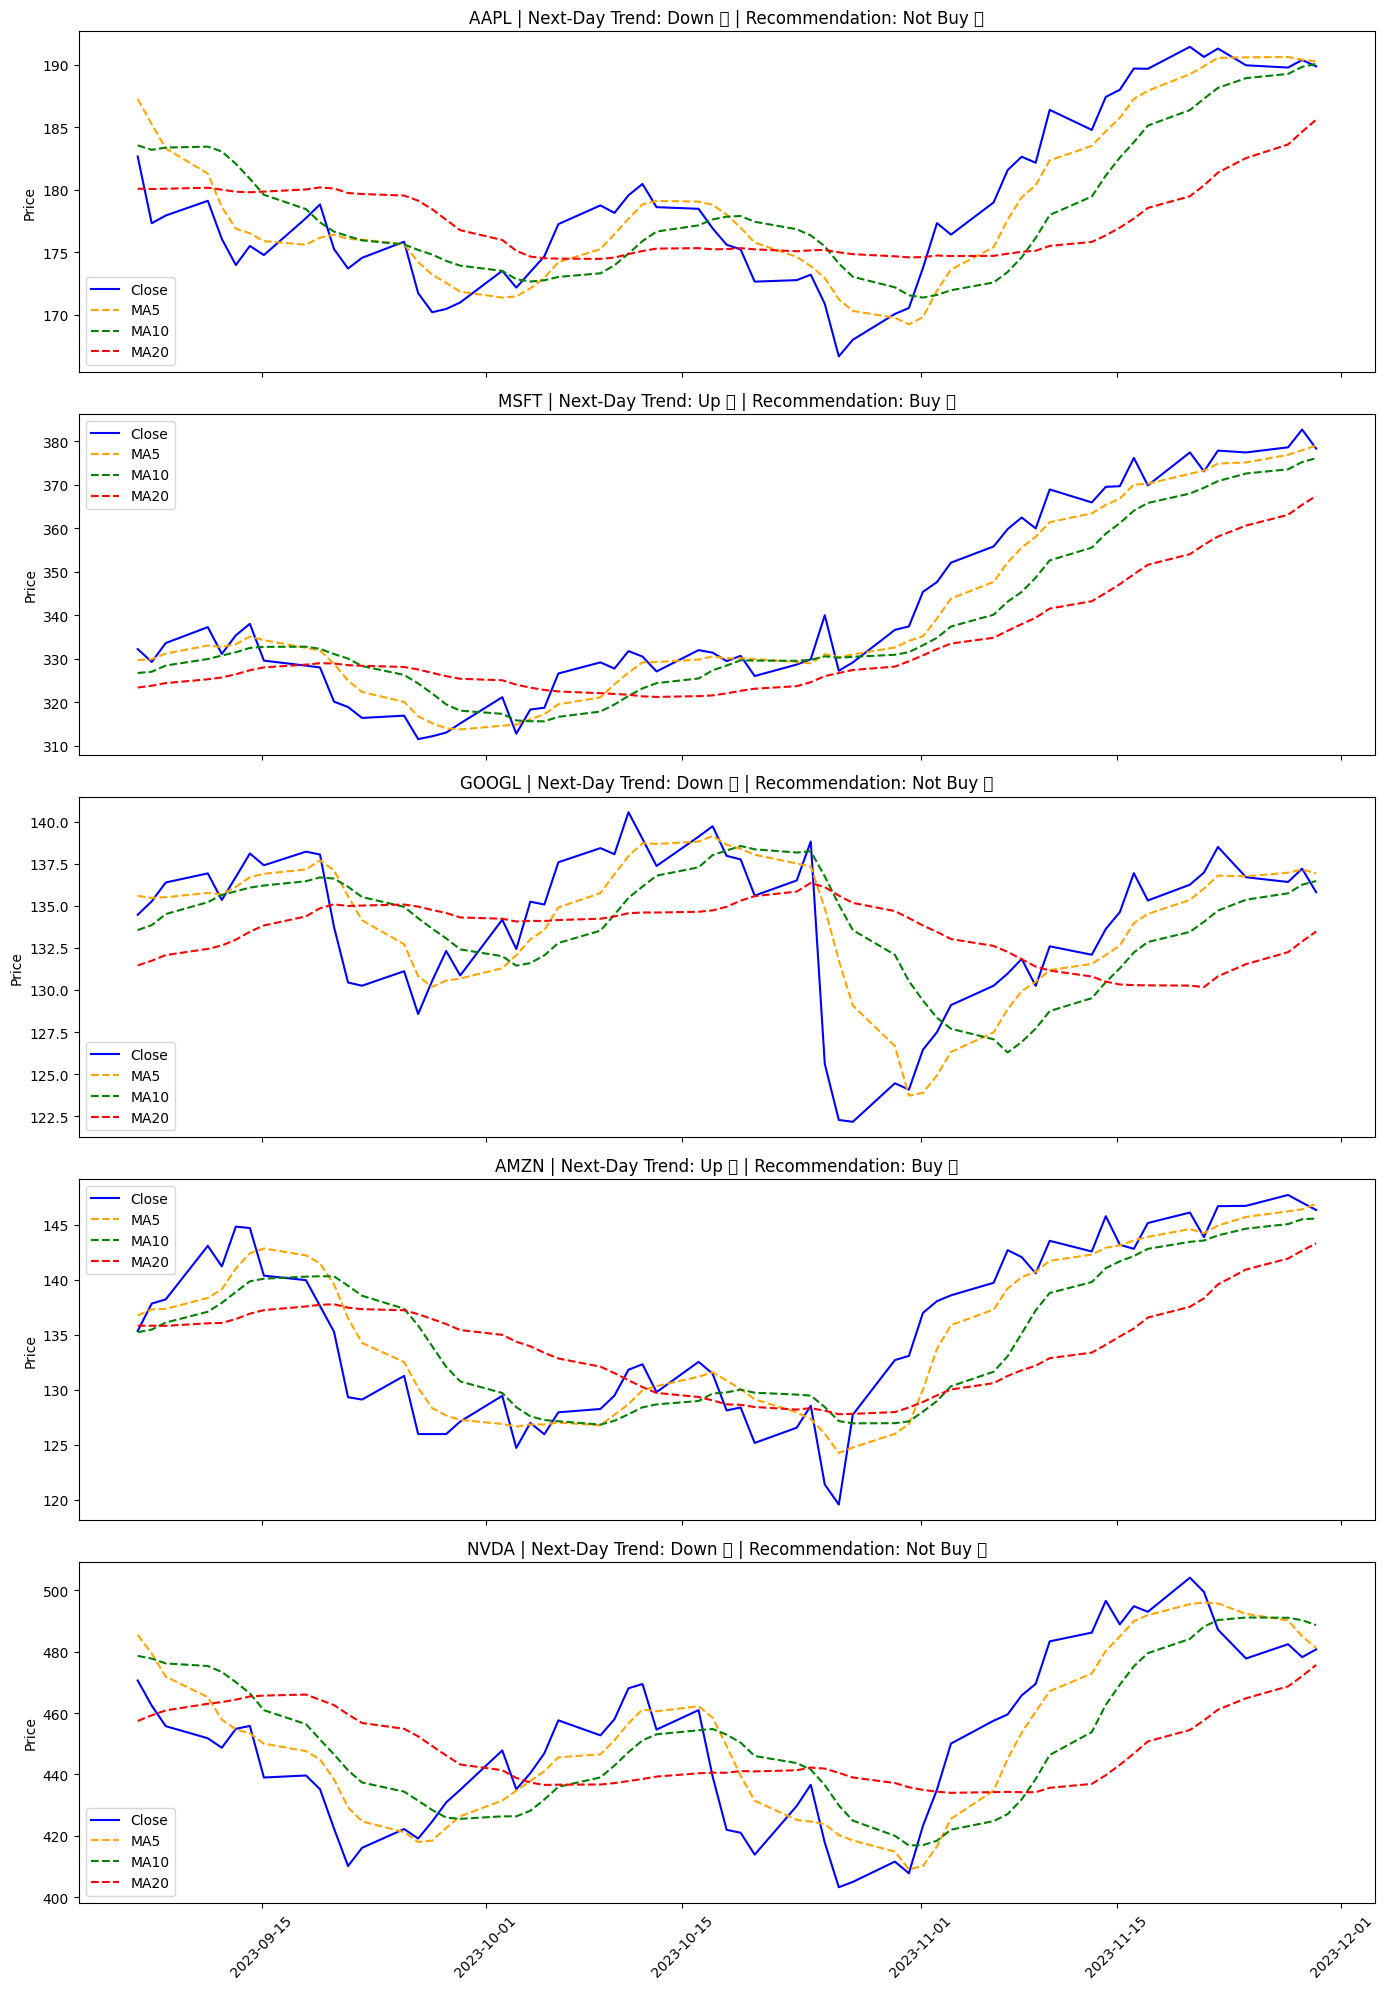

Cycle 1/5 complete ✅


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


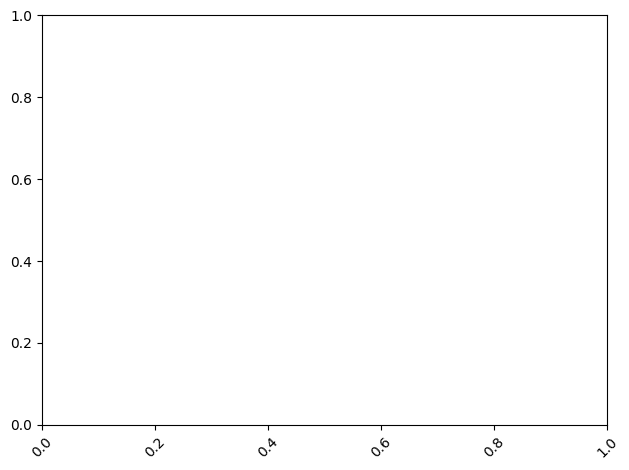

Cycle 2/5 complete ✅


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


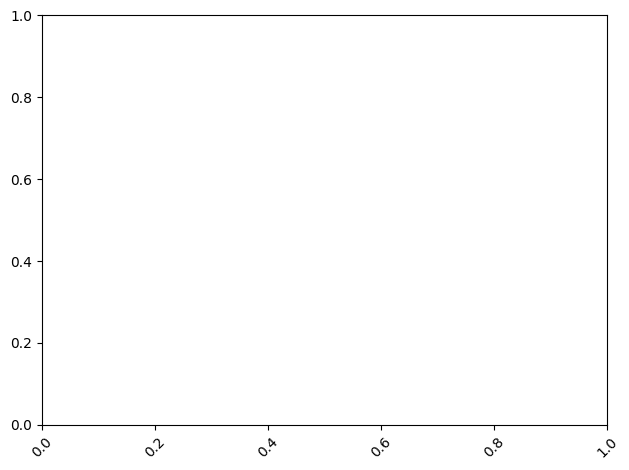

Cycle 3/5 complete ✅


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


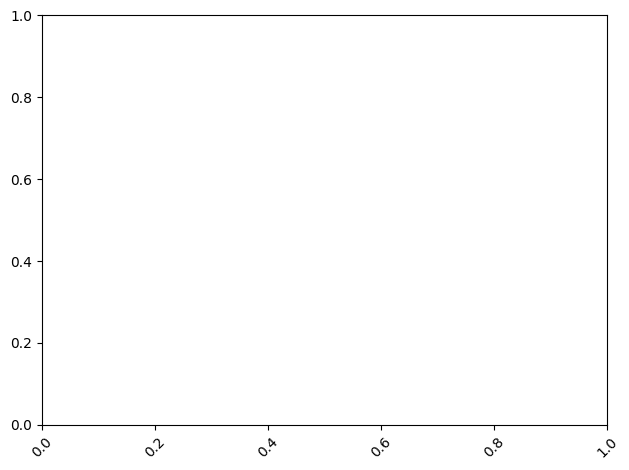

Cycle 4/5 complete ✅


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


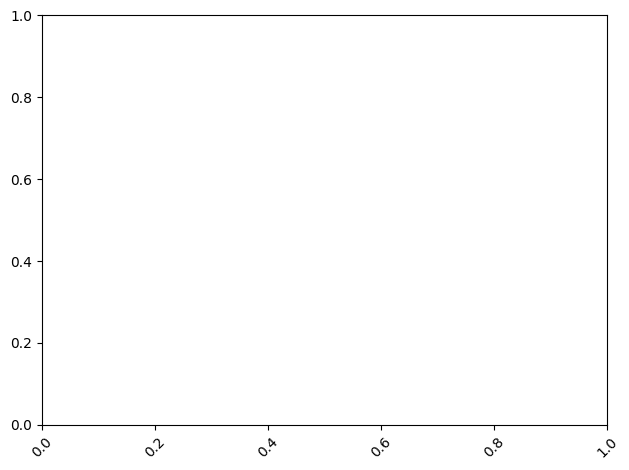

Cycle 5/5 complete ✅


In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from xgboost import XGBClassifier
from sklearn.preprocessing import StandardScaler
import time

# ------------------ Feature Engineering ------------------
def compute_features(df):
    df = df.copy()
    df['Return'] = (df['Close'] - df['Open']) / df['Open']
    df['Prev_Close'] = df['Close'].shift(1)
    df['Pct_Change'] = (df['Close'] - df['Prev_Close']) / df['Prev_Close']

    df['MA5'] = df['Close'].rolling(5).mean()
    df['MA10'] = df['Close'].rolling(10).mean()
    df['MA20'] = df['Close'].rolling(20).mean()
    df['Volatility'] = df['Close'].rolling(10).std()

    # RSI
    delta = df['Close'].diff()
    gain = delta.where(delta > 0, 0).rolling(14).mean()
    loss = -delta.where(delta < 0, 0).rolling(14).mean()
    rs = gain / loss
    df['RSI'] = 100 - (100 / (1 + rs))

    # MACD
    df['EMA12'] = df['Close'].ewm(span=12, adjust=False).mean()
    df['EMA26'] = df['Close'].ewm(span=26, adjust=False).mean()
    df['MACD'] = df['EMA12'] - df['EMA26']

    # Bollinger Bands
    rolling_std = df['Close'].rolling(20).std()
    df['BB_Upper'] = df['MA20'] + 2 * rolling_std
    df['BB_Lower'] = df['MA20'] - 2 * rolling_std

    # OBV
    df['OBV'] = (np.sign(df['Close'].diff()) * df['Volume']).fillna(0).cumsum()

    df = df.dropna()
    return df

# ------------------ Load CSV ------------------
file_path = "stock_details_5_years.csv"
df_all = pd.read_csv(file_path)
df_all["Date"] = pd.to_datetime(df_all["Date"], utc=True)
df_all = df_all.sort_values(["Company", "Date"])

companies = ["AAPL", "MSFT", "GOOGL", "AMZN", "NVDA"]

# ------------------ Train XGBoost Models ------------------
models = {}
scalers = {}
features = ['Open','High','Low','Close','Volume','Return','Pct_Change',
            'MA5','MA10','MA20','Volatility','RSI','MACD','BB_Upper','BB_Lower','OBV']

for company in companies:
    df = df_all[df_all["Company"] == company].copy()
    df = compute_features(df)

    df['Next_Close_1'] = df['Close'].shift(-1)
    df = df.dropna()
    df['Trend1'] = (df['Next_Close_1'] > df['Close']).astype(int)

    X = df[features]
    y = df['Trend1']

    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)

    model = XGBClassifier(
        n_estimators=200,
        max_depth=4,
        learning_rate=0.05,
        subsample=0.8,
        colsample_bytree=0.8,
        random_state=42,
        use_label_encoder=False,
        eval_metric='logloss'
    )
    model.fit(X_scaled, y)

    models[company] = model
    scalers[company] = scaler

print("✅ Next-day models trained successfully.")

# ------------------ Recommendation Function ------------------
def recommend(trend_pred):
    if trend_pred == 1:
        return "Buy ✅"
    elif trend_pred == 0:
        return "Not Buy ❌"
    else:
        return "Neutral ⚠️"

# ------------------ Visualization Loop (5 cycles) ------------------
plt.ion()
fig, axes = plt.subplots(len(companies), 1, figsize=(14, 4*len(companies)), sharex=True)

for run in range(5):  # Only 5 cycles
    for i, company in enumerate(companies):
        df = df_all[df_all["Company"] == company].copy()
        df = compute_features(df)
        df = df.tail(60)  # last 60 days

        latest_features = df[features].iloc[-1:].values
        latest_scaled = scalers[company].transform(latest_features)
        trend_pred = models[company].predict(latest_scaled)[0]
        rec = recommend(trend_pred)

        axes[i].clear()
        df.set_index("Date", inplace=True)

        # Plot Close price + moving averages
        axes[i].plot(df.index, df['Close'], label='Close', color='blue')
        axes[i].plot(df.index, df['MA5'], label='MA5', linestyle='--', color='orange')
        axes[i].plot(df.index, df['MA10'], label='MA10', linestyle='--', color='green')
        axes[i].plot(df.index, df['MA20'], label='MA20', linestyle='--', color='red')

        axes[i].set_ylabel('Price')
        axes[i].set_title(f"{company} | Next-Day Trend: {'Up 📈' if trend_pred==1 else 'Down 📉'} | Recommendation: {rec}")
        axes[i].legend()

    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.pause(0.5)
    print(f"Cycle {run+1}/5 complete ✅")
    time.sleep(2)

plt.ioff()
plt.show()
